<a href="https://colab.research.google.com/github/LavleenPDekatey/Projects/blob/main/Classification_of_Mobile_price_range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual (Lavleen Prabhakar Dekatey)

# **Project Summary -**

As a mobile phone company we would like to know the parameters which drive the prices high to sustain and compete in mobile phone market. The parameters in our data which will help us predict the prices are Battery power, Bluetooth, clock speed, dual sim, front camera, primary camera, 4G and 3G network connectivity, internal memory capacity, number of core in processor, pixel resolution, longest that a  single battery can last over a call, wifi connectivity and corresponding price range.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


###In the competitive market of mobile phones, we should understand what drives the prices of mobile phones and what features attract the customer in each price segment. Thus making the business profitable considering all price ranges.

###The customers have wide range of choices of mobile phone features like Ram, internal memory, front camera, primary camera etc. So to standout as a brand we must make a user centric phone and guide the selling prices according to the features of mobile.

###In this project we will analyze sales data of mobile phones and predict how high the prices of mobile phones should be.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz



import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/Almabetter Data science/Projects/project 3/data_mobile_price_range.csv'

In [ ]:
df=pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns',None)

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<Axes: >

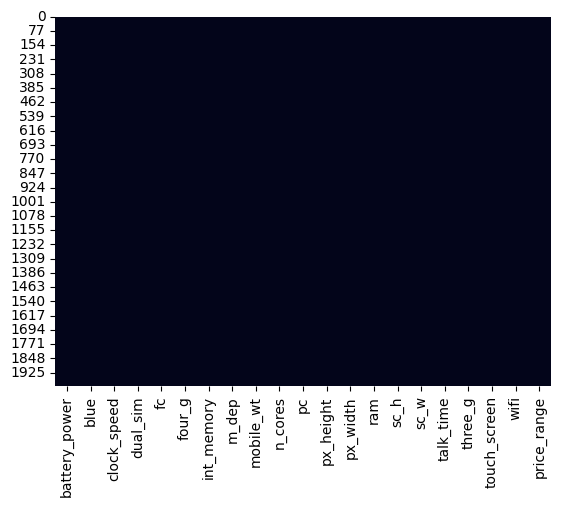

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

The Dataset given is mobile sales data. We have to predict the price range indicating how high the price is.

Mobile price range prediction is the analytical study of classification of mobile price range according to features in the mobile.

The above dataset has 2000 rows and 21 columns. There are no missing values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

* **Battery power:** Battery capacity in Mili Ampere Hour
* **Blue:** Has Bluetooth or not
* **Clock Speed:** Speed at which microprocessor executes instruction
* **Dual Sim:** Has dual sim support or not
* **Fc:** front camera megapixel
* **Four_g:** Has 4G or not
* **Int Memory:** internal memory capacity
* **M-dep:** Mobile depth in cm
* **Mobile_wt:** Weight of mobile phone
* **N_cores:** Number of cores in processor
* **Pc:** Primary camera megapixel
* **Px_heaight:** Pixel resolution height
* **Px_width:** Pixel resolution width
* **Ram:** Random access memory in MB
* **Sc_h:** Screenheight
* **Sc_w:** Screenwidth
* **Talk_time:** Longest that a single battery can last over a call
* **Three_g:** Has 3g or not
* **Wifi:** Has Wifi or not
* **Price_range** This is the target variable with a value of 0(Low cost), 1(Medium cost), 2(High cost), 3(Very high cost)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#putting data of not having dual sim feature in mobile in variable dual_sim_0.
dual_sim_0=df[df['dual_sim']==0]
dual_sim_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528,1416,3978,17,16,3,1,1,0,3


In [ ]:
#putting data of having dual sim feature in mobile in variable dual_sim_1.
dual_sim_1=df[df['dual_sim']==1]
dual_sim_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3


In [ ]:
#we groupby data of no dual sim feature in mobile by mobile slimness and weight which are body features and with their corresponding price range.
body_dual_sim=dual_sim_1.groupby(['price_range','m_dep'])['mobile_wt'].mean().unstack()
body_dual_sim

m_dep,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
price_range,,,,,,,,,,
0,136.868421,144.322581,147.576923,130.111111,133.500000,147.380952,142.576923,142.600000,135.269231,128.900000
1,143.571429,133.060606,140.040000,143.000000,142.129032,125.625000,135.850000,149.032258,140.041667,149.263158
2,141.522727,153.857143,136.741935,149.437500,144.035714,150.250000,151.380952,152.055556,145.884615,140.153846
3,138.396226,134.600000,120.100000,142.920000,133.740741,138.066667,121.913043,132.966667,139.533333,139.333333


In [ ]:
#we groupby data of dual sim feature in mobile by mobile slimness and weight which are body features and with their corresponding price range.
body_no_dual_sim=dual_sim_0.groupby(['price_range','m_dep'])['mobile_wt'].mean().unstack()
body_no_dual_sim

m_dep,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
price_range,,,,,,,,,,
0,136.510204,141.176471,133.382353,155.250000,148.600000,151.235294,139.821429,139.620690,146.000000,136.700000
1,146.848485,130.464286,144.476190,134.388889,145.666667,143.275862,138.115385,142.380952,141.240000,139.764706
2,139.605263,150.148148,130.320000,143.760000,138.500000,140.111111,125.933333,154.878788,151.533333,140.230769
3,129.135135,154.210526,137.764706,134.363636,131.960000,142.724138,147.307692,136.076923,134.227273,142.833333


In [ ]:
#we are multiplying screen height and screen width and saying the product as variable screen_area
df['screen_area']=df['sc_h']*df['sc_w']

In [ ]:
#we are multiplying pixel height and pixel width and saying the product as variable px_resolution_size_per_square_inch
df['px_resolution_size_per_square_inch']=df['px_height']*df['px_width']

In [ ]:
#dropping column named as pixel height, pixel width, screen height and screen width as we have 2 variables which are product of this
df=df.drop(['px_height','px_width','sc_h','sc_w'],axis=1)

In [ ]:
#we groupby screen area and pixel resolution according to price range which are display features and put it in display variable
display=df.groupby(['screen_area','price_range'])['px_resolution_size_per_square_inch'].mean().unstack()
display

price_range,0,1,2,3
screen_area,,,,
0,654326.979592,8.436745e+05,8.999800e+05,1.126439e+06
5,270587.000000,1.058284e+06,5.868320e+05,1.162212e+06
6,885016.500000,1.024069e+06,1.295262e+06,9.477190e+05
7,501000.000000,1.191432e+06,1.202489e+06,6.265748e+05
8,450934.000000,9.177519e+05,NaN,6.829887e+05
...,...,...,...,...
288,NaN,NaN,9.376500e+05,1.486291e+06
304,NaN,3.537350e+05,1.002193e+06,1.369402e+06
306,224455.000000,NaN,2.451277e+06,8.616728e+05


In [ ]:
#we groupby number of cores and clock speed according to price range which are processor features and put it in processor_parameter variable
processor_parameter=df.groupby(['price_range','n_cores'])['clock_speed'].value_counts().unstack().fillna(0)

In [ ]:
#we groupby internal memory and ram according to price range which are memory feature and put it in memory variable
memory=df.groupby(['int_memory','price_range'])['ram'].mean().unstack()

In [ ]:
#we groupby front camera and primary camera according to price range which are camera feature and put it in camera variable
camera=df.groupby(['price_range','fc'])['pc'].value_counts().unstack().fillna(0)

In [ ]:
#we groupby bluetooth and wifi according to price range which are communication feature and put it in communication variable
communication=df.groupby(['blue','price_range'])['wifi'].value_counts().unstack()

In [ ]:
#choosing battery power and price range from the given dataset and assigning it to df_battery variable
df_battery=df[['battery_power','price_range']]

In [ ]:
#sorting battery power by its values
df_battery=df_battery.sort_values(by='battery_power')

In [ ]:
#we groupby three_g and four_g according to price range which are network type features
network=df.groupby(['three_g','price_range'])['four_g'].value_counts().unstack().fillna(0)

In [ ]:
#we are showing columns which are having integer data
df.describe().columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_area',
       'px_resolution_size_per_square_inch'],
      dtype='object')

In [ ]:
#we are removing columns which are having dichotomous data that is yes(1) or no(0)
df1=set(df.describe().columns)-{'blue','dual_sim','four_g','three_g','touch_screen','wifi'}
df1

{'battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'price_range',
 'px_resolution_size_per_square_inch',
 'ram',
 'screen_area',
 'talk_time'}

### What all manipulations have you done and insights you found?

* We will get more insights from graphical representation more clearly but before that we have done some coding by using some logic which can help us understand the features which drive the cost high as it is.
* Firstly we have separated the mobiles having dual sim and not having dual sim by putting the separate data in separate variable.
* We have made a group of features like body, display, processor, memory, camera, communication, battery and network type to see whether this group of feature are together affecting the price range of mobiles.
* We multiplied the screen height and screen width and named its product as screen area to reduce the number of independant variable.
* We multiplied pixel height and pixel width and named the product as px_resolution_size_per_square_inch to reduce the number of independant variable.
* We made a df_battery variable which is having two columns named battery_power and price_range and sorted this data according to battery_power because we want to make a graph giving us insight about how battery power feature is related to price range.
* We removed the dichotomous feature name from numerical columns as it is categorical feature.  

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Mobile Weight')

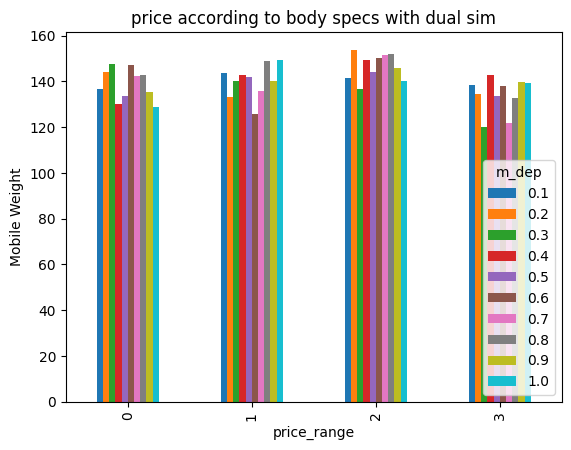

In [ ]:
# Chart - 1 visualization code
body_dual_sim.plot(kind='bar')

plt.title('price according to body specs with dual sim')
plt.legend(loc='lower right',title='m_dep')
plt.ylabel('Mobile Weight')

Text(0, 0.5, 'Mobile Weight')

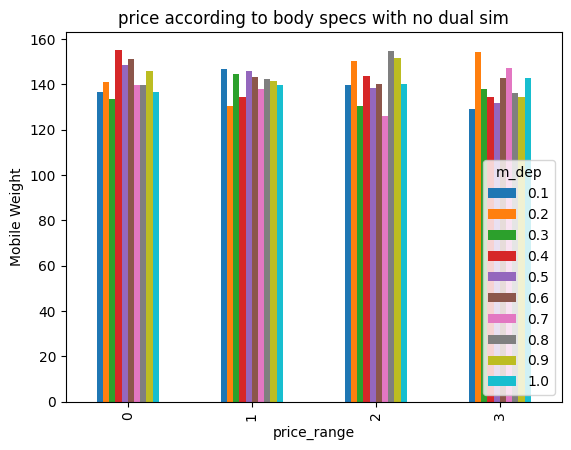

In [ ]:
body_no_dual_sim.plot(kind='bar')

plt.title('price according to body specs with no dual sim')
plt.legend(loc='lower right',title='m_dep')
plt.ylabel('Mobile Weight')

##### 1. Why did you pick the specific chart?

We have used bar chart to show the insight of how the mobile weigh's among different price ranges which is a categorical feature, so it is good to use bar chart.


##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is there is no linearity in data either considering weight or slimness of mobile with respect to price range whether it is mobile with dual sim or no dual sim.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight gained considering the body features as it is not showing any pattern.

#### Chart - 2

Text(0, 0.5, 'resolution size')

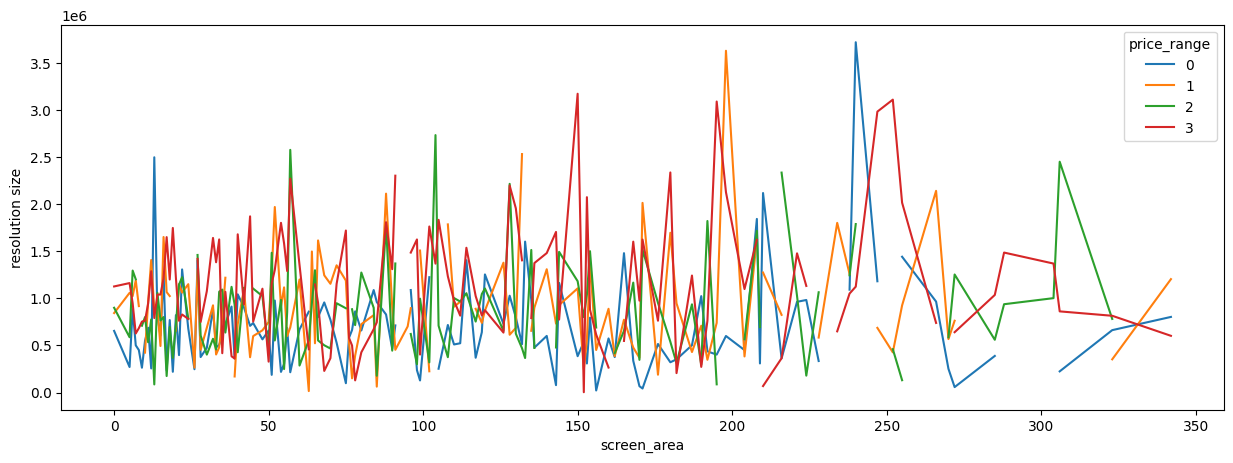

In [ ]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (15, 5)
display.plot()
plt.ylabel('resolution size')

##### 1. Why did you pick the specific chart?

We used line chart to show wide range of values of screen area having different resolution sizes corresponding to different prize ranges.

##### 2. What is/are the insight(s) found from the chart?

As the screen area is increasing, the resolution size is having ups and downs. We are having peak value of different price ranges are as follows:

* 0(low cost) at resolution size of 3.6*10^6 and screen area of around 240.
* 1(medium cost) at resolution size of 3.5*10^6 and screen area of around 200.
* 2(high cost) at resolution size of 2.7*10^6 and screen area of around 105.
* 3(very high cost) at resolution size of 3.1*10^6 and screen area of around 150.

This shows that there is no pattern which shows linearity of the values in the graph.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  We have not got any insight from display group of features.

#### Chart - 3

Text(0, 0.5, "total count of clock speed's")

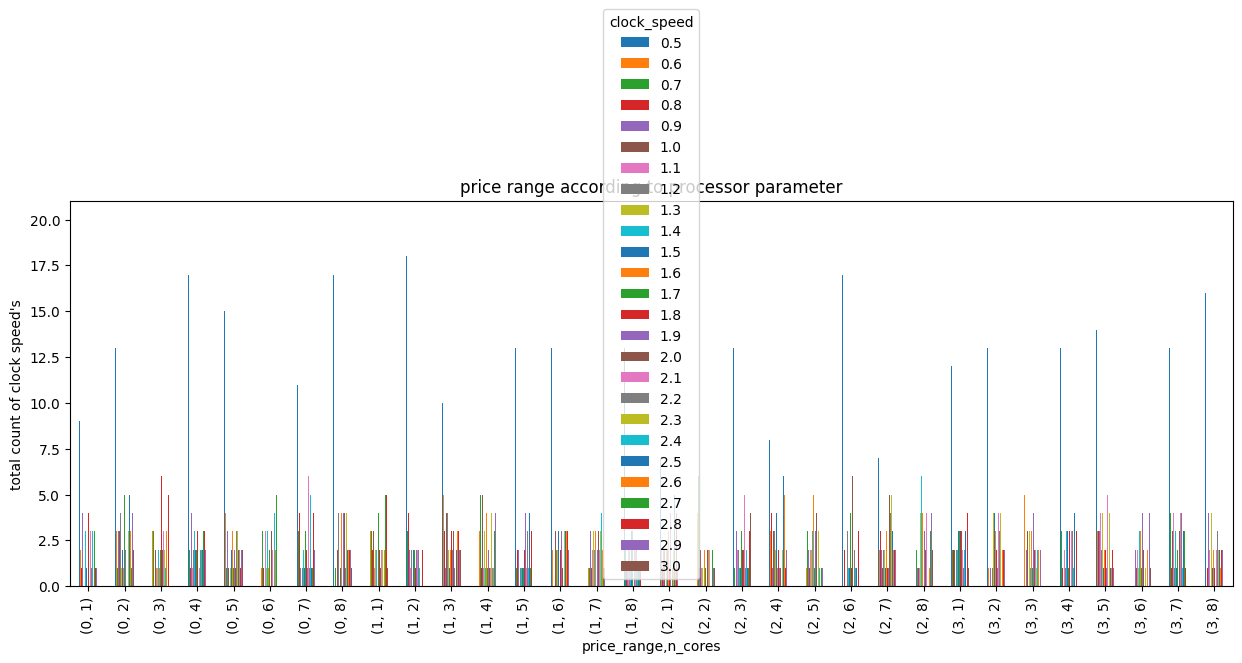

In [ ]:
# Chart - 3 visualization code
processor_parameter.plot(kind='bar')
plt.title('price range according to processor parameter')
plt.ylabel("total count of clock speed's")

##### 1. Why did you pick the specific chart?

We used the bar chart to show categorical feature as it is good to represent categorical  parameter on x axis and its corresponding values such as count on y axis.

##### 2. What is/are the insight(s) found from the chart?

Mobile phones with Clock speed of 0.5 is most common among all cores and price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The clockspeed of 0.5 which is the lowest value is common among all price segment which means customer are not attracted towards mobiles which have high clockspeed.

#### Chart - 4

Text(0, 0.5, 'ram')

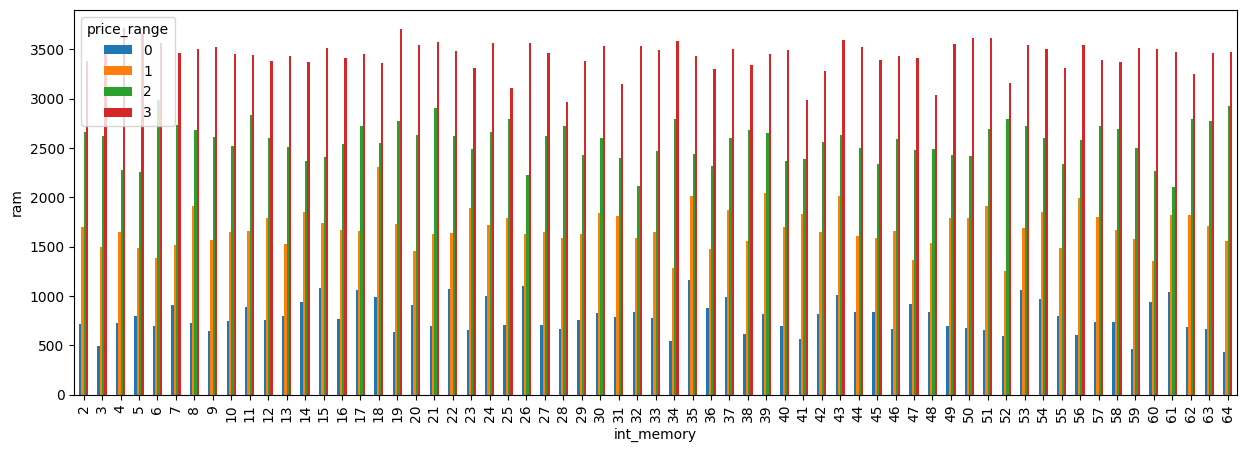

In [ ]:
# Chart - 4 visualization code
memory.plot(kind='bar')
plt.ylabel('ram')

##### 1. Why did you pick the specific chart?

bar charts are good to represent categorical features and we are categorizing internal memory according to its wide range of values. So we used bar chart.

##### 2. What is/are the insight(s) found from the chart?

We have found the insight from the chart that as ram increases price range also increases among all internal memory category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Thus we can use ram feature to drive our prices high which will have good impact on business profit.

#### Chart - 5

Text(0, 0.5, 'count of mobile having primary camera')

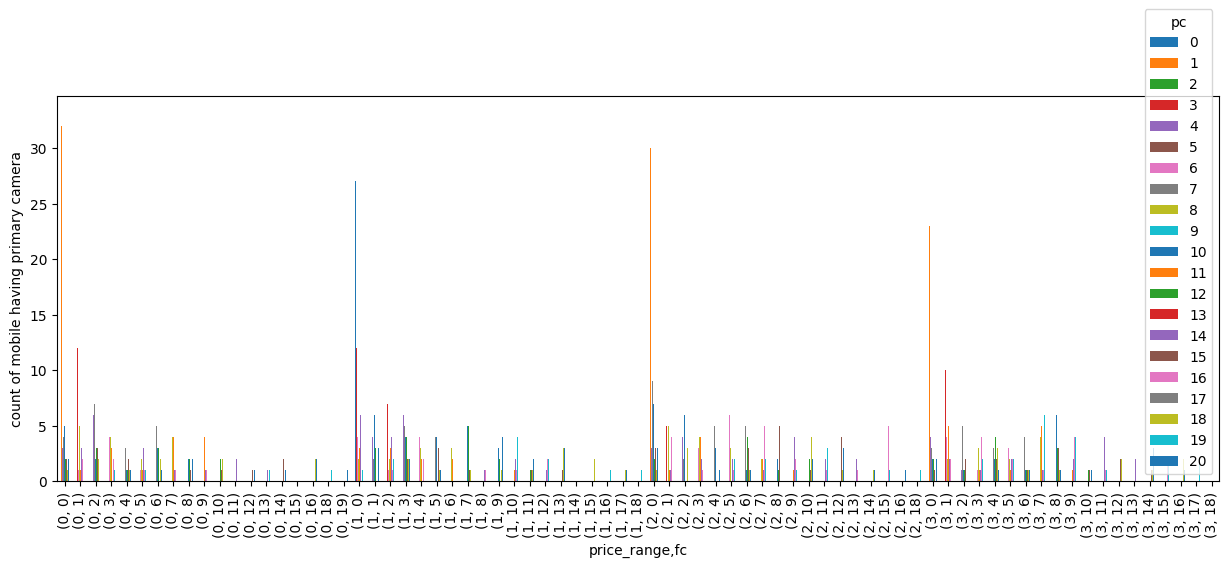

In [ ]:
# Chart - 5 visualization code
camera.plot(kind='bar')
plt.ylabel('count of mobile having primary camera')

##### 1. Why did you pick the specific chart?

We have used bar chart to represent price range and front camera megapixel as we are using it as categorical feature.

##### 2. What is/are the insight(s) found from the chart?

We found insight from the chart that primary camera with 1 megapixel value are having max count among three price segment means except medium price range all price ranges have max count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer are not much attracted to mobiles with high megapixel camera that is company can even make mobile with less megapixel even then the mobile will get sold.

#### Chart - 6

Text(0, 0.5, 'count of mobile having wifi feature or not')

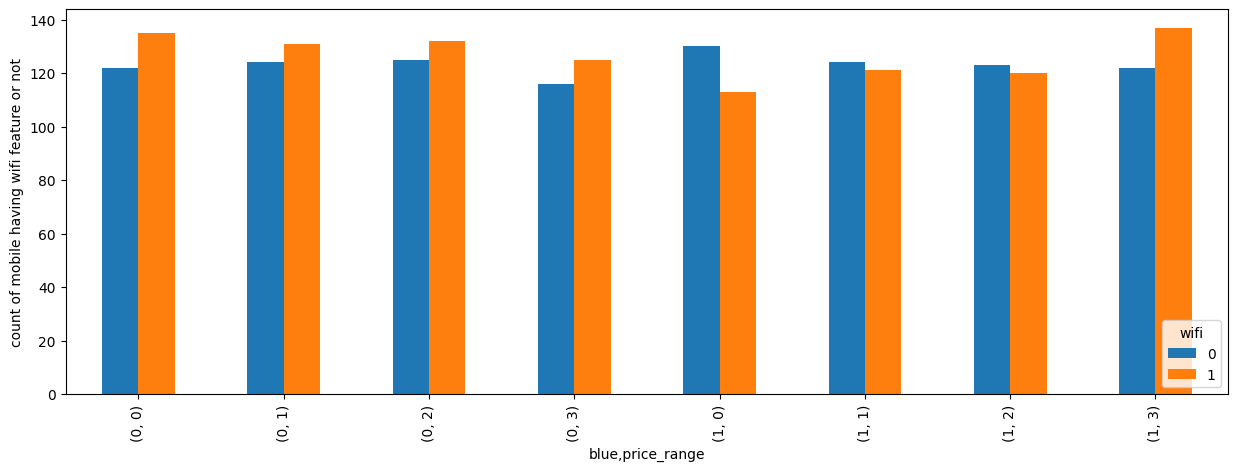

In [ ]:
# Chart - 6 visualization code
communication.plot(kind='bar')
plt.legend(title='wifi',loc='lower right')
plt.ylabel('count of mobile having wifi feature or not')

##### 1. Why did you pick the specific chart?

We picked the bar chart as it is useful in representing data with categorical feature which are dichotomous and feature which are having 4 classes.

##### 2. What is/are the insight(s) found from the chart?

There are less number of customers who prefer bluetooth with wifi compared to bluetooth with no wifi but as the price range increases number of customers prefering bluetooth with wifi increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The graph shows there are more customers who prefer bluetooth or wifi in the mobile and as price range increases customers expectation increases regarding feature.

#### Chart - 7

Text(0, 0.5, 'price_range')

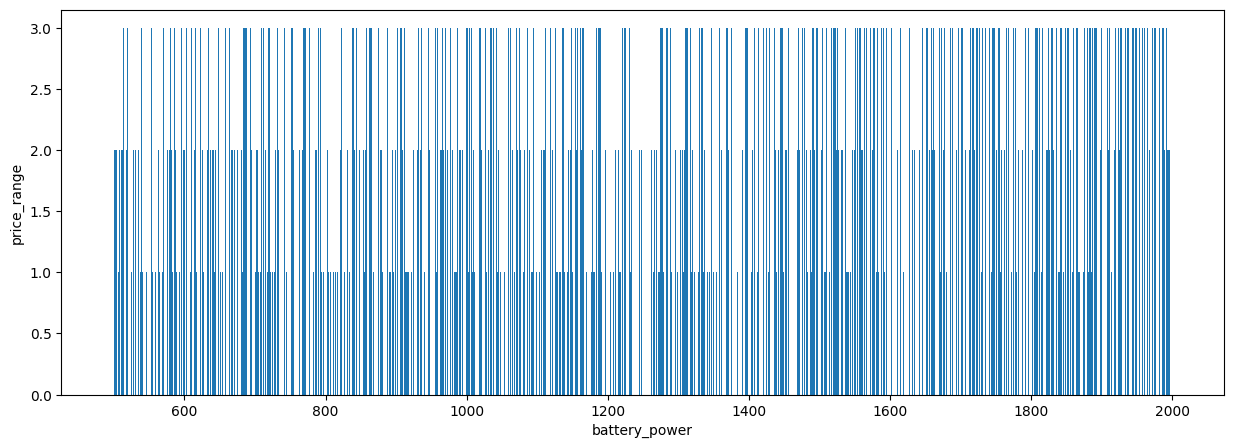

In [ ]:
# Chart - 7 visualization code
plt.bar(df_battery['battery_power'],df_battery['price_range'])
plt.xlabel('battery_power')
plt.ylabel('price_range')

##### 1. Why did you pick the specific chart?

We picked the bar chart as it is good to represent wide range of categories of battery power corresponding to price range value.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that no matter how much battery power  it is, the corresponding value can always have any price range. There is no linear relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We gained the insight that we have freedom to give any value of battery power to mobile phone and the mobile will still have demand.

#### Chart - 8

Text(0, 0.5, 'count of mobiles with or without 4g network')

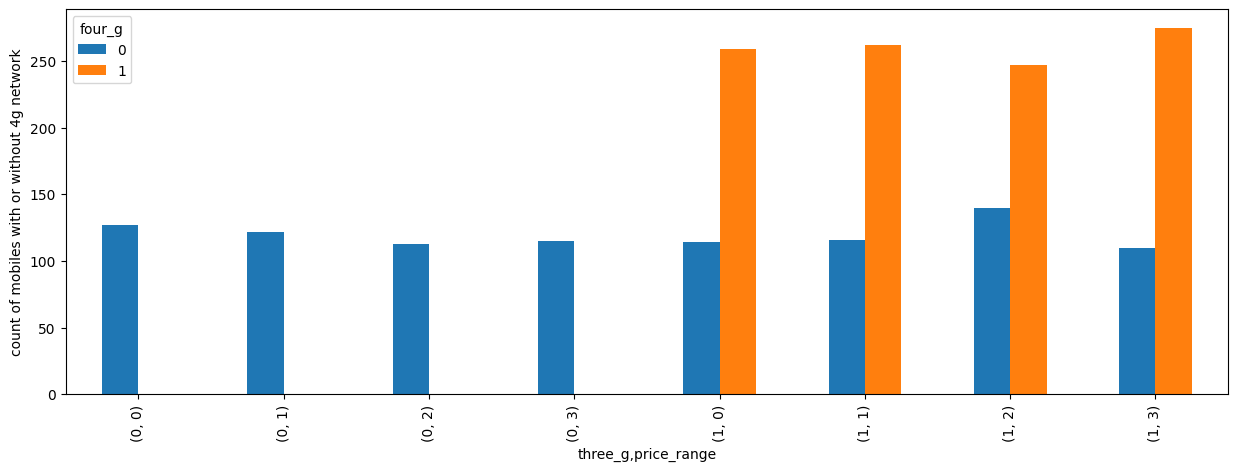

In [ ]:
# Chart - 8 visualization code
network.plot(kind='bar')
plt.ylabel('count of mobiles with or without 4g network')

##### 1. Why did you pick the specific chart?

We have picked up the bar chart for representing the data as we have categorical feature with corresponding count of mobile phones.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is we have more number of mobile phones which have 4G as well as 3G network means customer prefer mobiles with both 4G and 3G network and each price range have nearly equal number of 4G mobiles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We gained insight that we will have to give the 4G as well as 3G feature to mobile to each price range and the sales will be nearly similar no matter which price range. This will have positive impact as we know what customers prefer.

#### Chart - 9

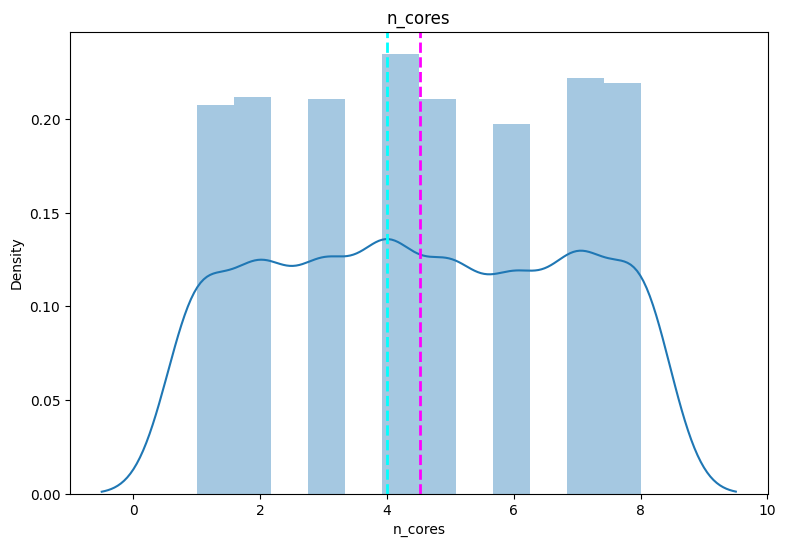

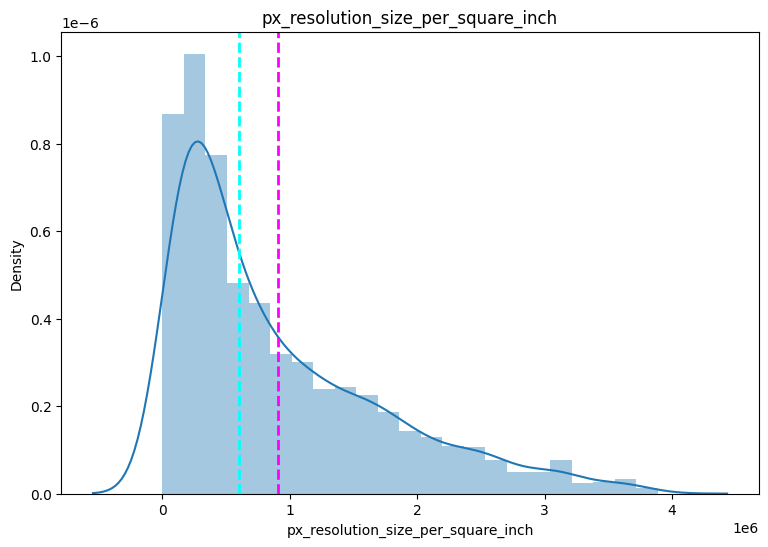

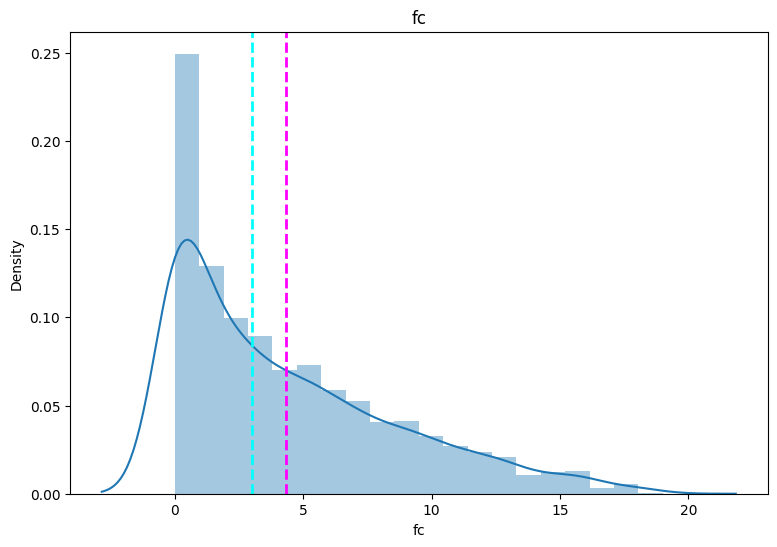

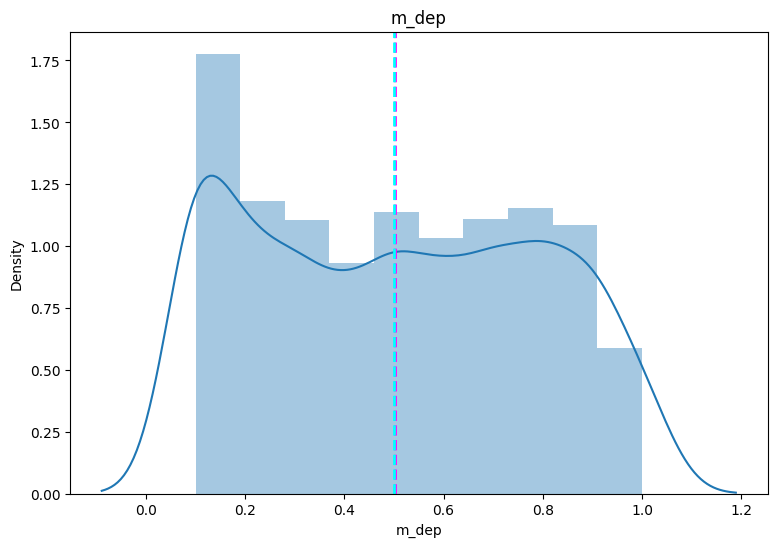

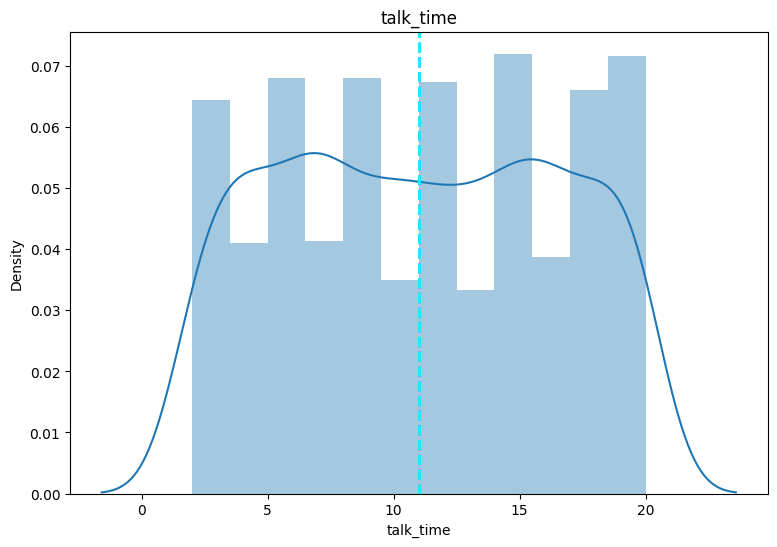

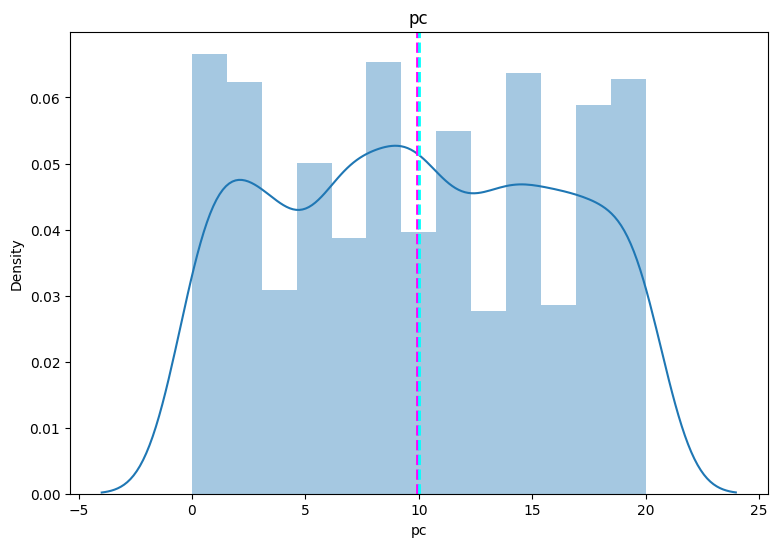

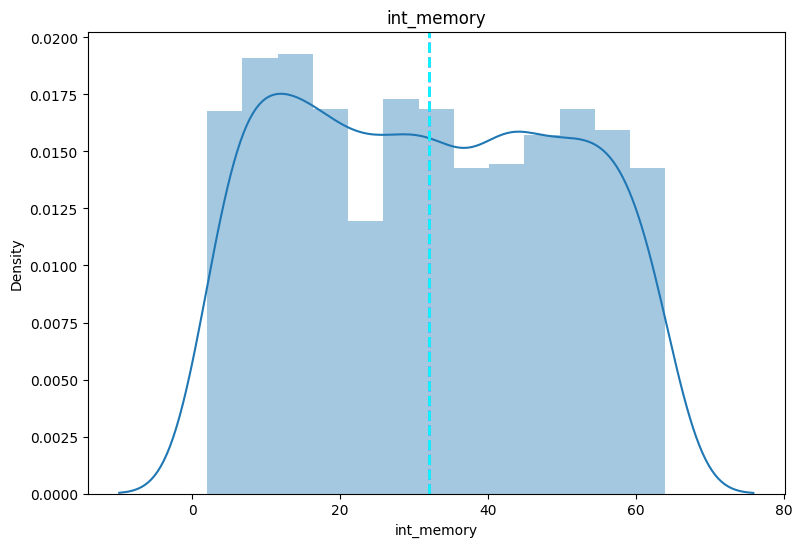

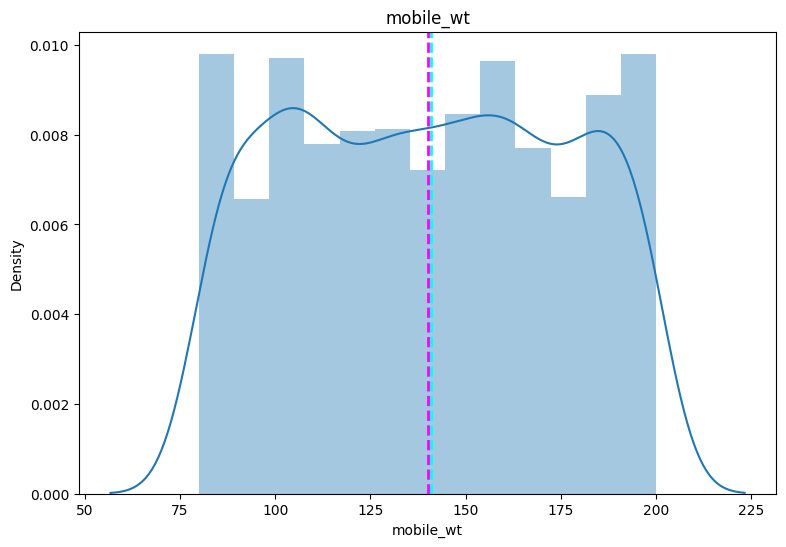

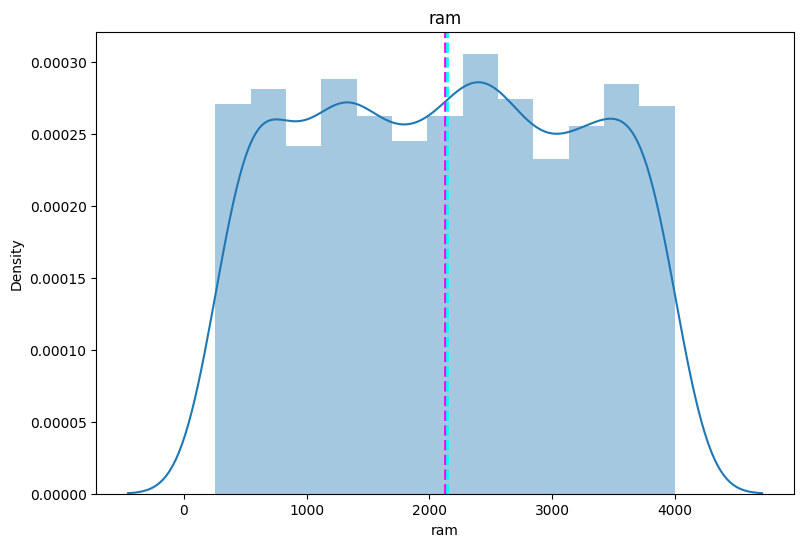

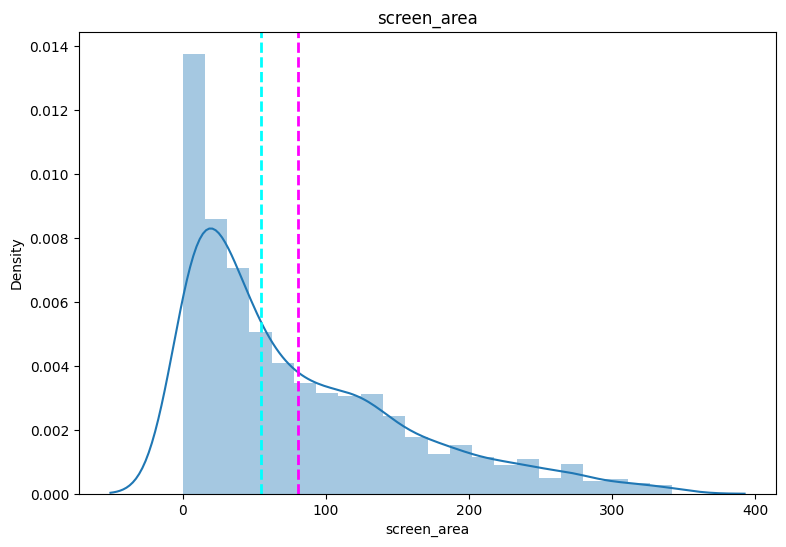

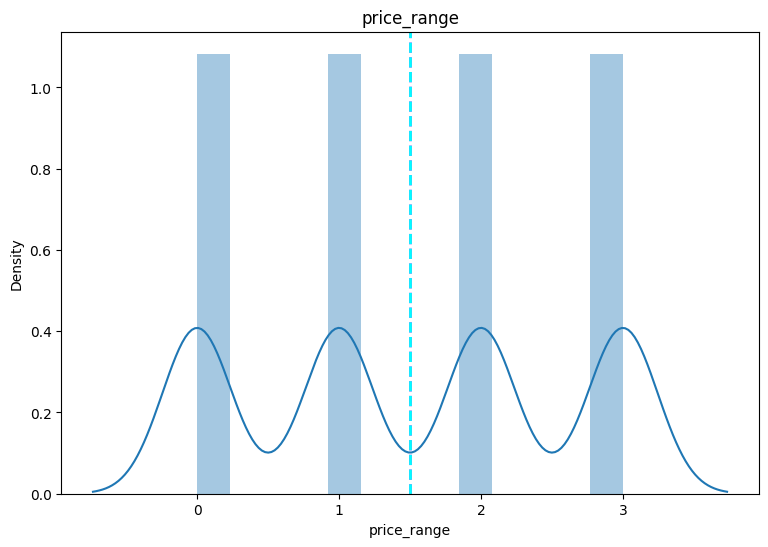

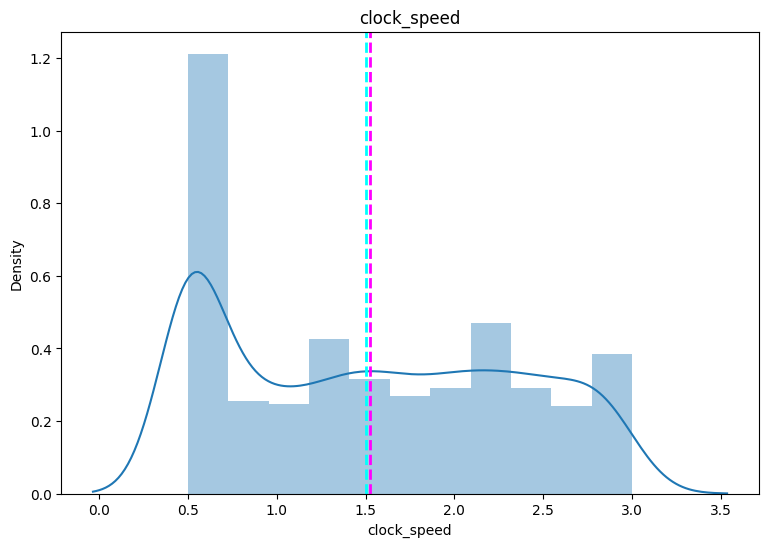

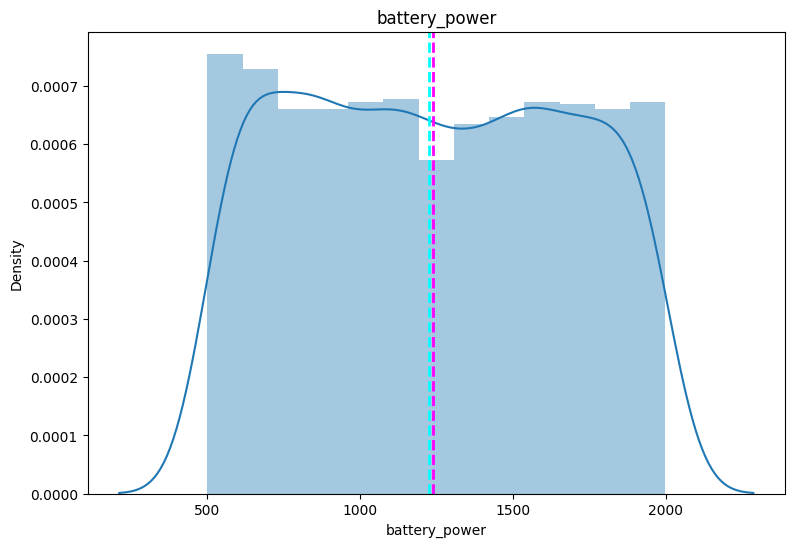

In [ ]:
# Chart - 9 visualization code
for col in df1:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

We picked the distplot as it is suitable for plotting the curve which shows the distribution of values.

##### 2. What is/are the insight(s) found from the chart?

We found the insight that which all numerical variables are normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The normally distributed data are having mean and median nearly equal which makes it predictable. We are trying to know which all feature are normally distributed. So it is having positive impact on business as it makes our target variable predictable.

#### Chart - 10

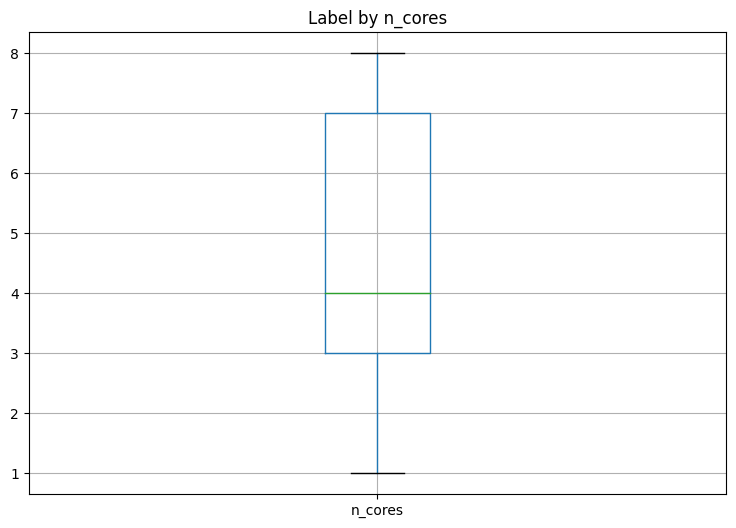

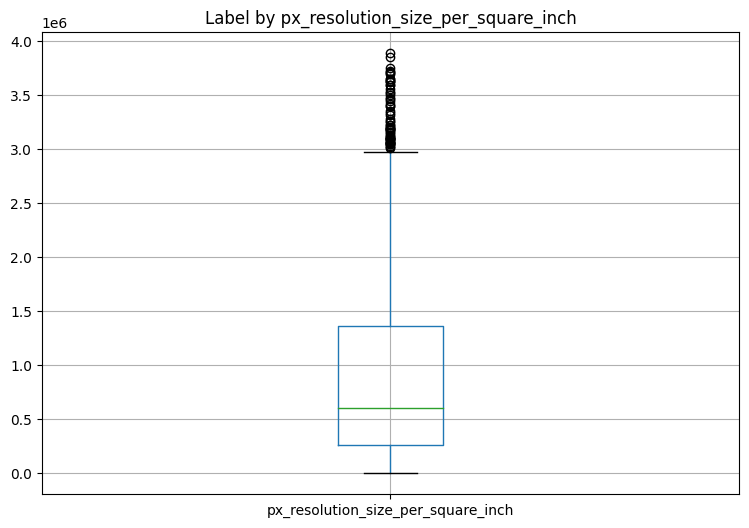

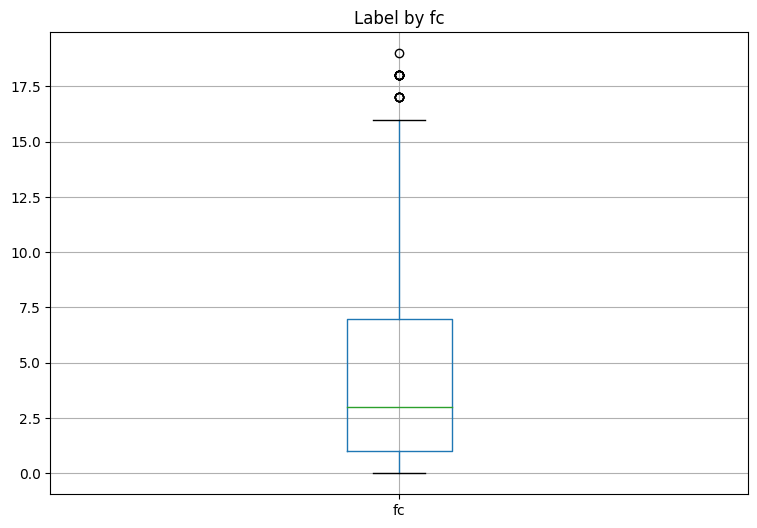

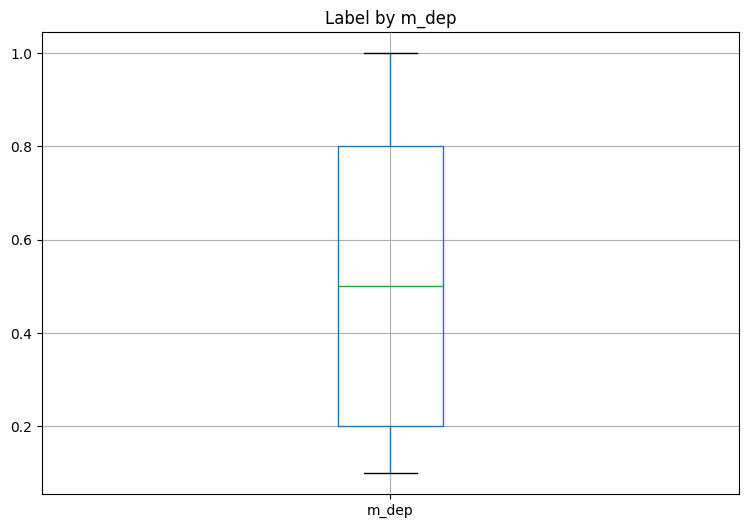

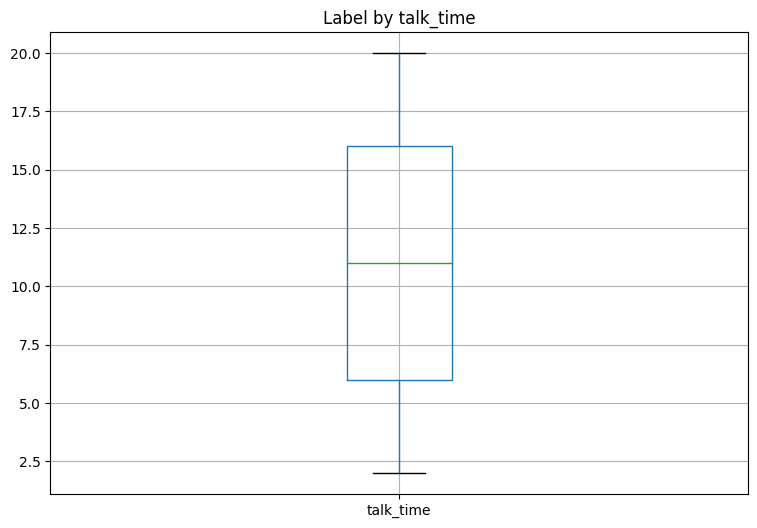

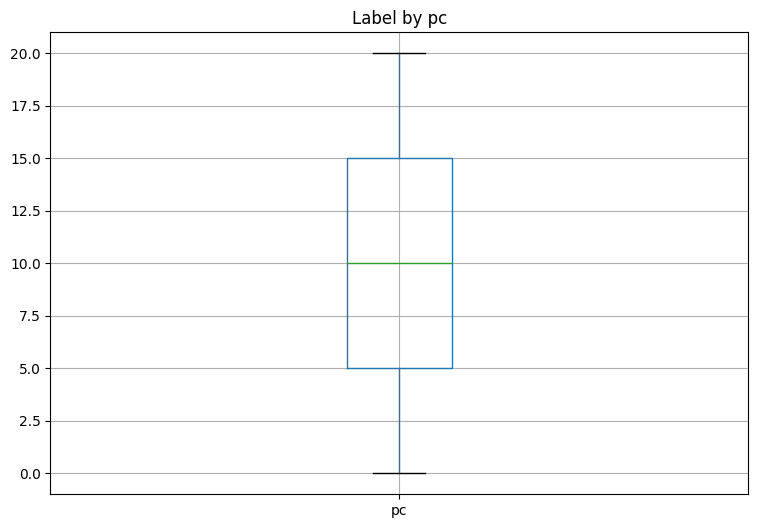

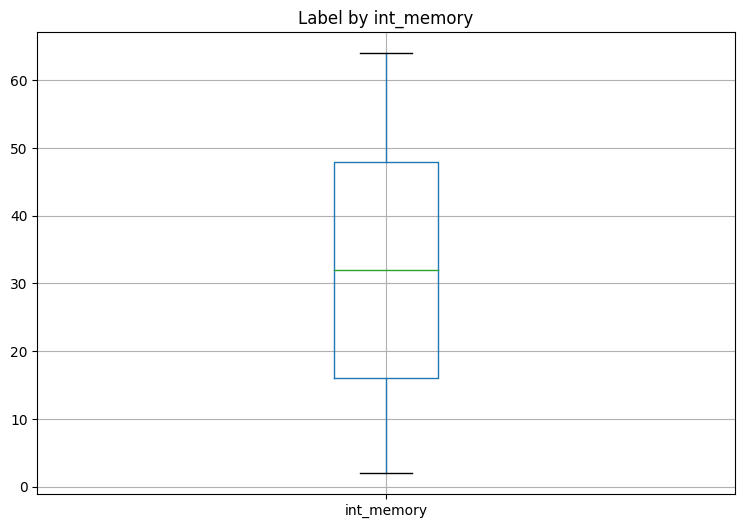

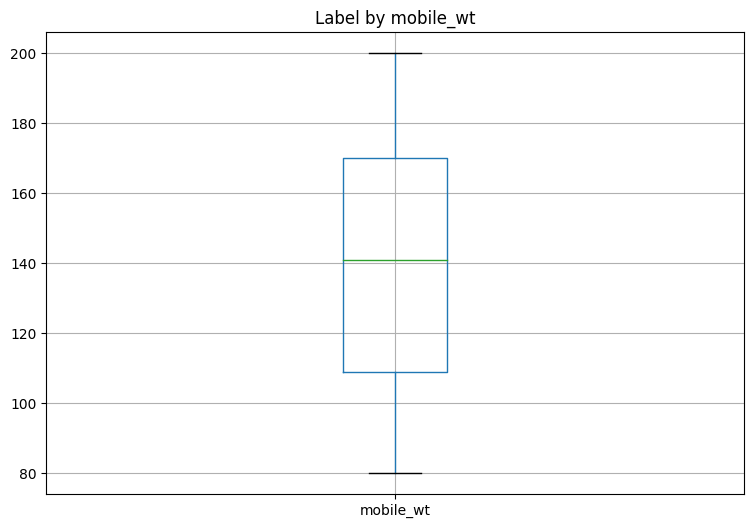

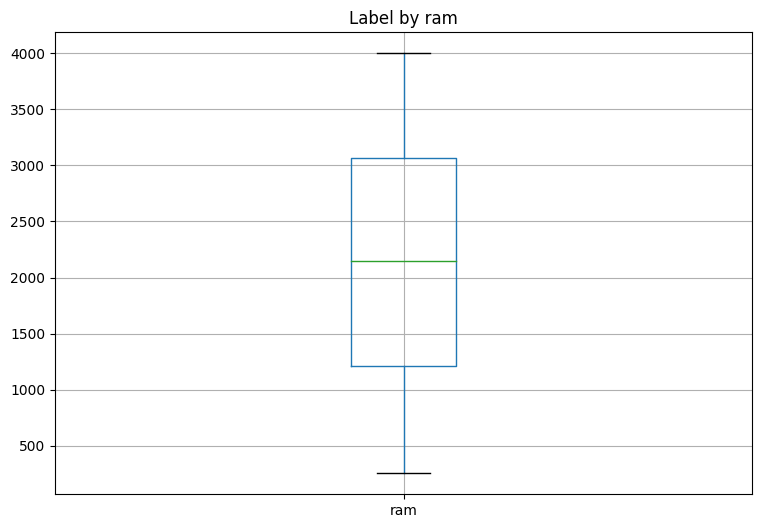

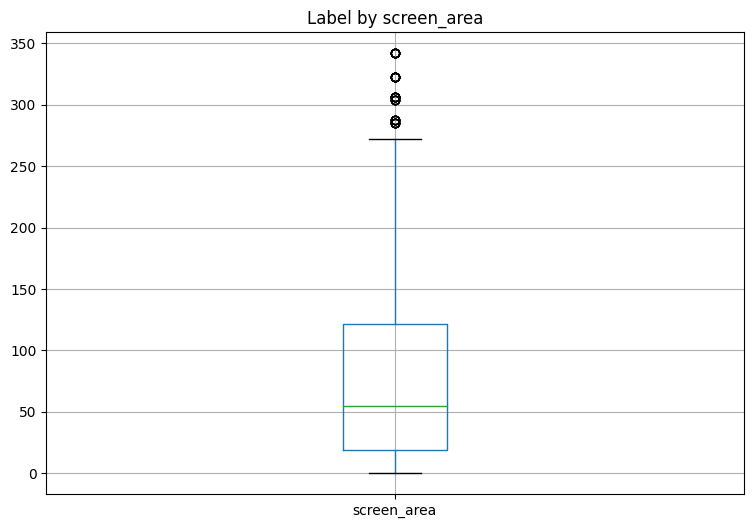

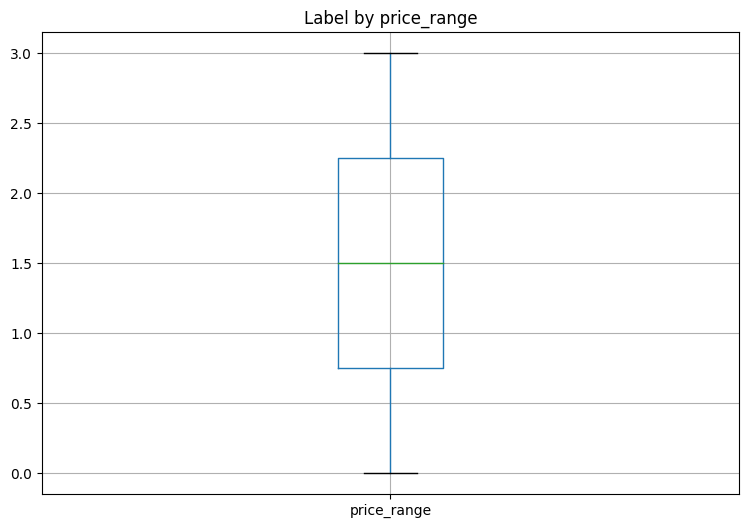

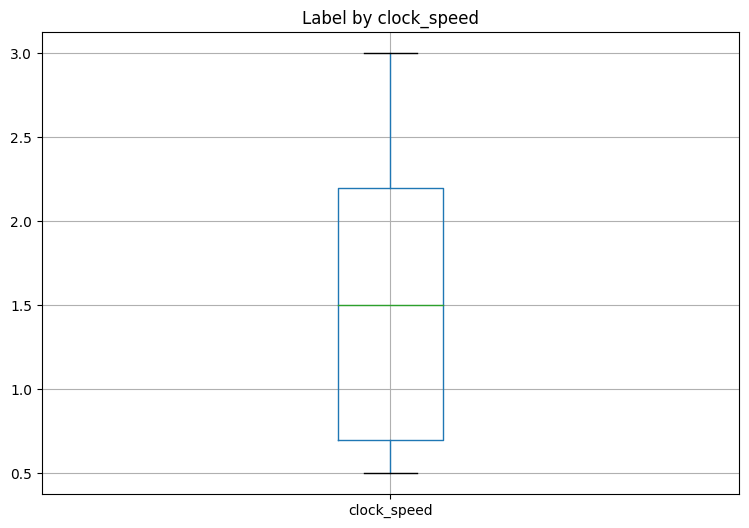

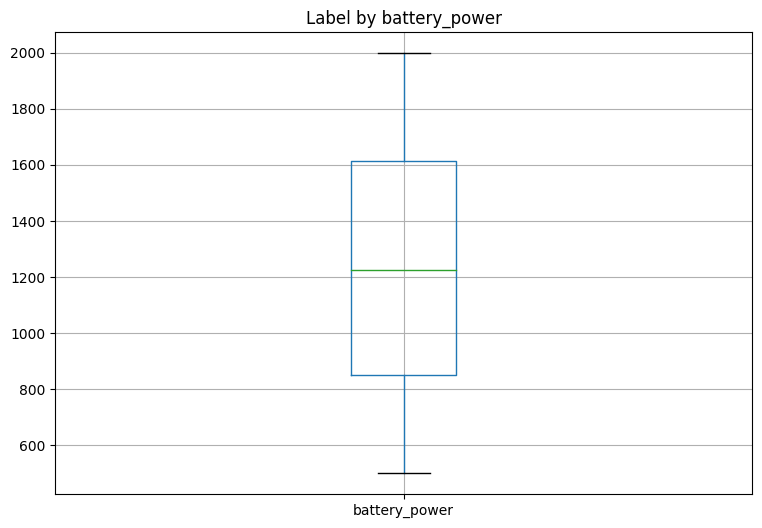

In [ ]:
# Chart - 10 visualization code
# Visualizing code of box plot for each columns to know the data distibution
for col in df1:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##### 1. Why did you pick the specific chart?

We are using the box plot to know how our data is distributed

##### 2. What is/are the insight(s) found from the chart?

We found the insight that which all features are having the outlier so need's outlier treatment

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We gained the insight which will help us remove the outlier and make the target variable predictable which will have a positive impact on business

#### Chart - 11 - Correlation Heatmap

<Axes: >

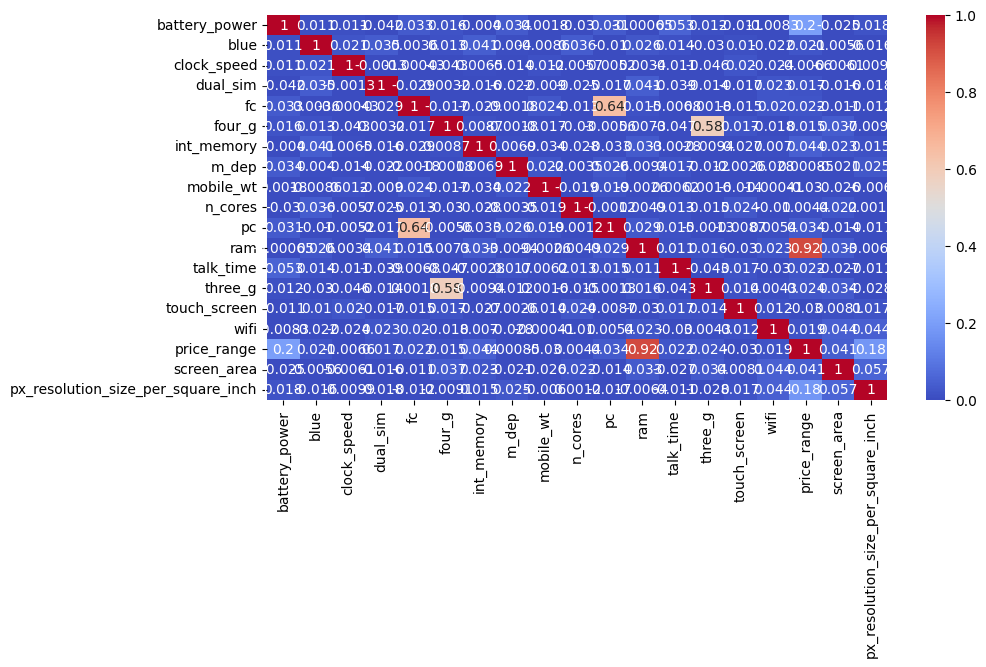

In [ ]:
# Correlation Heatmap visualization code
corr_df=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), vmin=0, cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

To know which all features have higher correlation value we used the correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

We found the insight that 4G and 3G, primary camera and front camera, price range and ram are correlated

#### Chart - 12 - Pair Plot

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1) The average battery power among the high cost mobile is atleast 1200.

2) The proportion of higher megapixel that is both in primary as well as front is atmost 10.

3) The average of internal memory is atleast 30 among high cost mobiles.

In [ ]:
# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value




# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

 The average battery power among the high cost mobile is atleast 1200

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 1200

Alternate Hypothesis : N < 1200

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# we are choosing the data having price range of high cost.
df_high_cost=df[df['price_range']==2]

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis_number = 1200
sample_mean =df_high_cost['battery_power'].mean()
size = len(df_high_cost)
std=(variance(df_high_cost['battery_power']))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=df_high_cost,col='battery_power')
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9189938126708369.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that it failed to reject the null hypothesis that is population average is atleast 1200.

##### Why did you choose the specific statistical test?

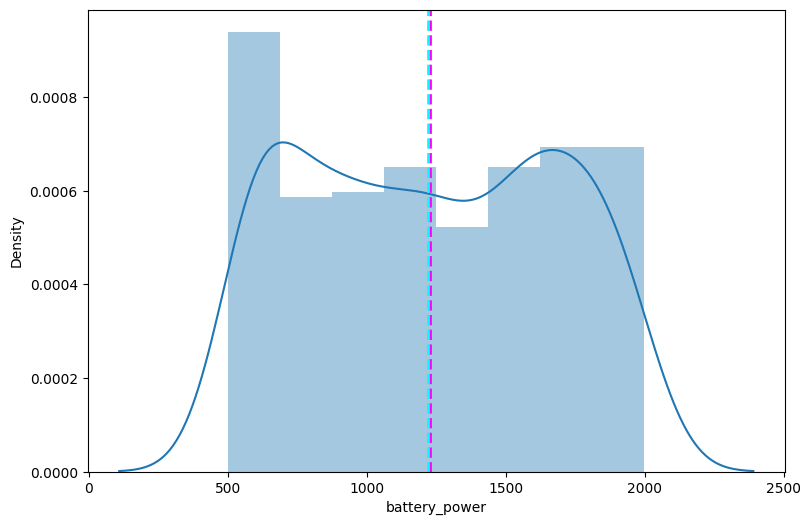

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (df_high_cost['battery_power'])
sns.distplot(df_high_cost['battery_power'])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
#ax.set_title(col)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

 The proportion of higher megapixel that is both in primary as well as front is atmost 10.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : proportion = 4

Alternate Hypothesis : proportion > 4

Test Type : Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# we are choosing the data which are having front camera and primary camera megapixel higher than 10
df_high_megapixel=df[(df['fc']>10)&(df['pc']>10)]

In [ ]:
high_megapixel_percentage=(len(df_high_megapixel)/len(df))*100
high_megapixel_percentage

11.05

In [ ]:
hypothesis_number = 0.10
sample_proportion = high_megapixel_percentage/100
size = len(df_high_megapixel)

In [ ]:
# Getting Z value
z = findz.proportion(sample_proportion,hypothesis_number,size)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=df_high_megapixel,col='price_range')
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.30142292518503.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that it failed to reject the null hypothesis which means proportion of higher megapixel that is both in primary as well as front camera is atmost 10.

##### Why did you choose the specific statistical test?

In [ ]:
df_high_megapixel['fc'].mean()-df_high_megapixel['fc'].median()

0.3438914027149327

In [ ]:
df_high_megapixel['pc'].mean()-df_high_megapixel['pc'].median()

0.004524886877828038

Both front camera and primary camera data are nearly equal to 0 so we have used z test.

### Hypothetical Statement - 3

 The average of internal memory is atleast 30 among high cost mobiles.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 30

Alternate Hypothesis : N < 30

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis_number = 32
sample_mean = df_high_cost['int_memory'].mean()
size = len(df_high_cost)
std=(variance(df_high_cost['int_memory']))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=df_high_cost,col='int_memory')
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.09518444374844043.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that it failed to reject the null hypothesis which means average of internal memory is atleast 30 among high cost mobiles.

##### Why did you choose the specific statistical test?

In [ ]:
df_high_cost['int_memory'].mean()-df_high_cost['int_memory'].median()

0.9200000000000017

The difference is almost equal to 0 so we have choosed the z test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

battery_power                         0
blue                                  0
clock_speed                           0
dual_sim                              0
fc                                    0
four_g                                0
int_memory                            0
m_dep                                 0
mobile_wt                             0
n_cores                               0
pc                                    0
ram                                   0
talk_time                             0
three_g                               0
touch_screen                          0
wifi                                  0
price_range                           0
screen_area                           0
px_resolution_size_per_square_inch    0
dtype: int64


<Axes: >

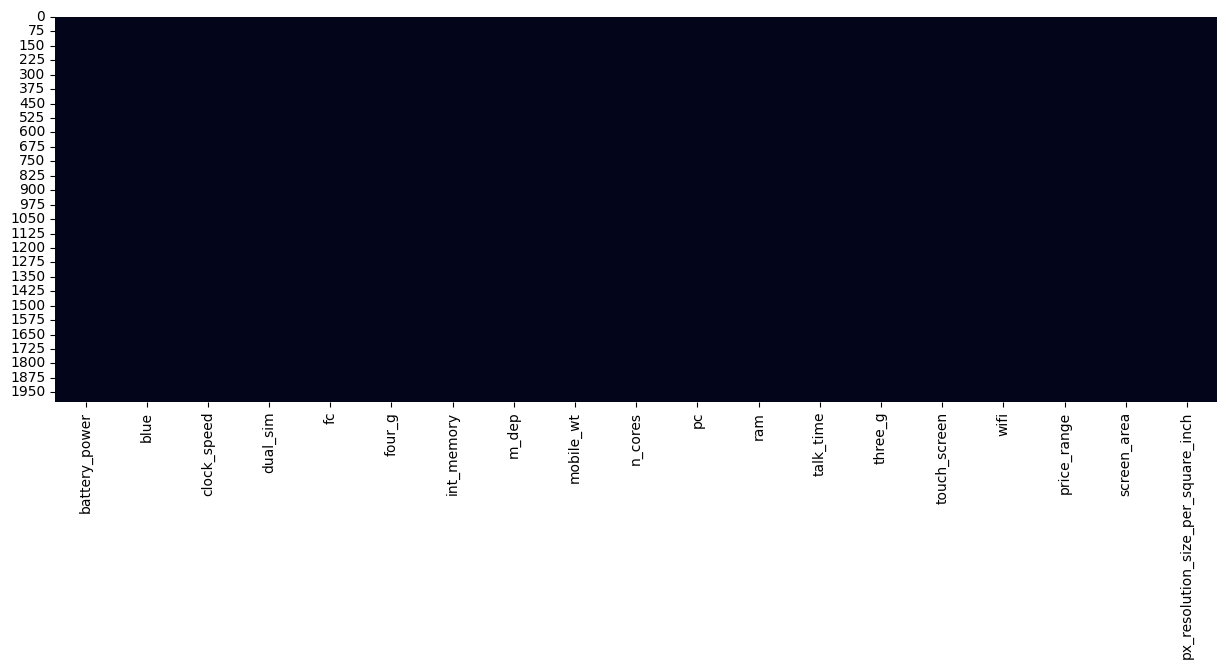

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
df1.remove('price_range')
for i in df1:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['m_dep', 'talk_time', 'pc', 'int_memory', 'clock_speed']
Skew Symmetric Distributed Features : - ['n_cores', 'px_resolution_size_per_square_inch', 'fc', 'mobile_wt', 'ram', 'screen_area', 'battery_power']


In [ ]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  df.loc[df[feature]<= outlier_treatment(df=df,feature=feature)[1], feature]=outlier_treatment(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment(df=df,feature=feature)[0], feature]=outlier_treatment(df=df,feature=feature)[0]

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

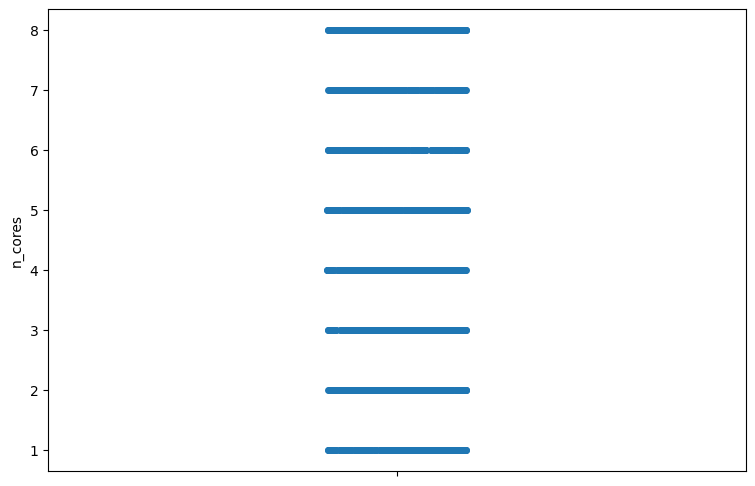

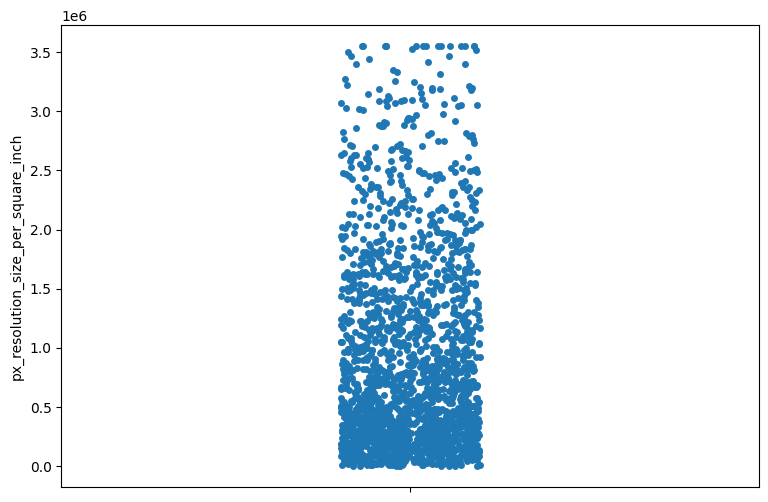

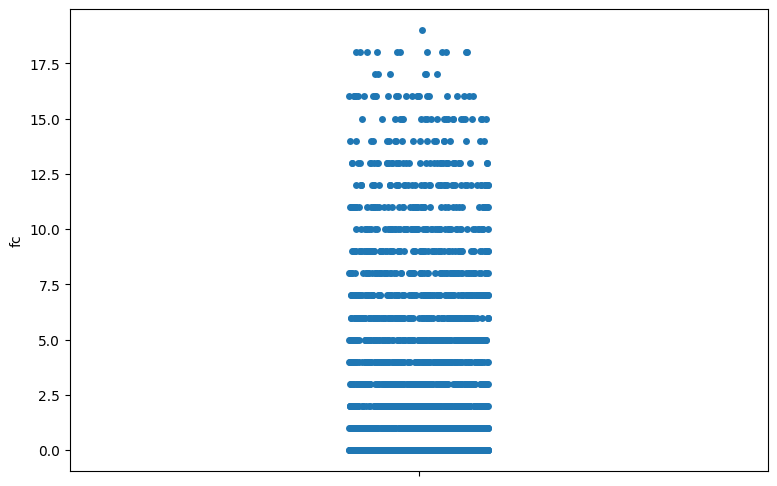

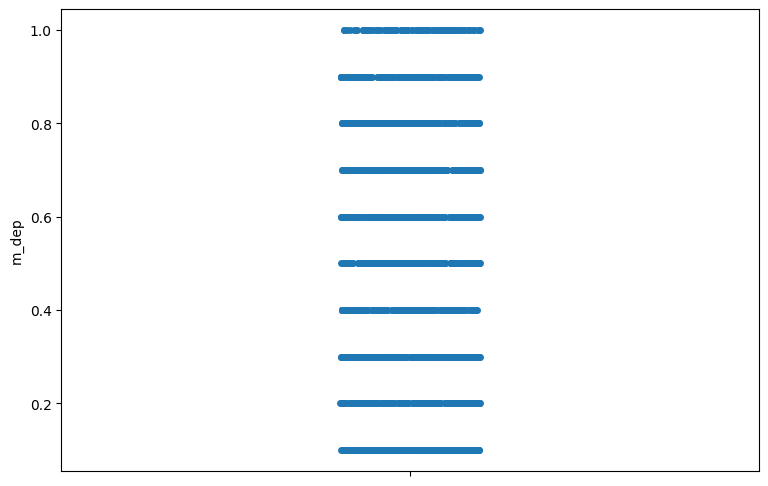

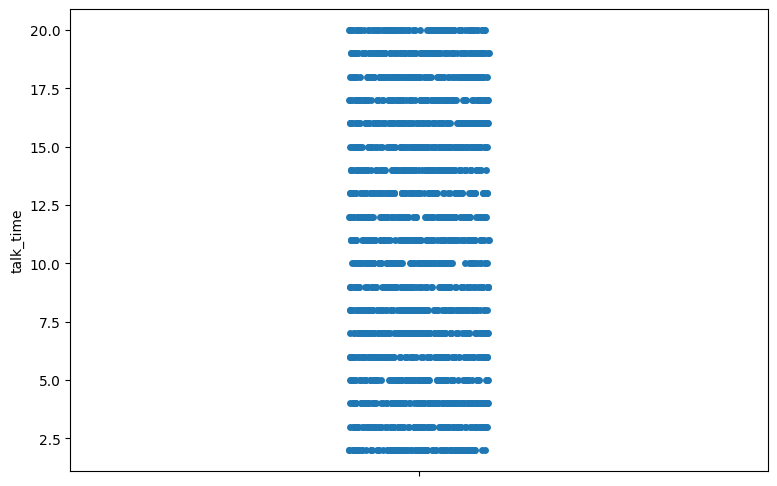

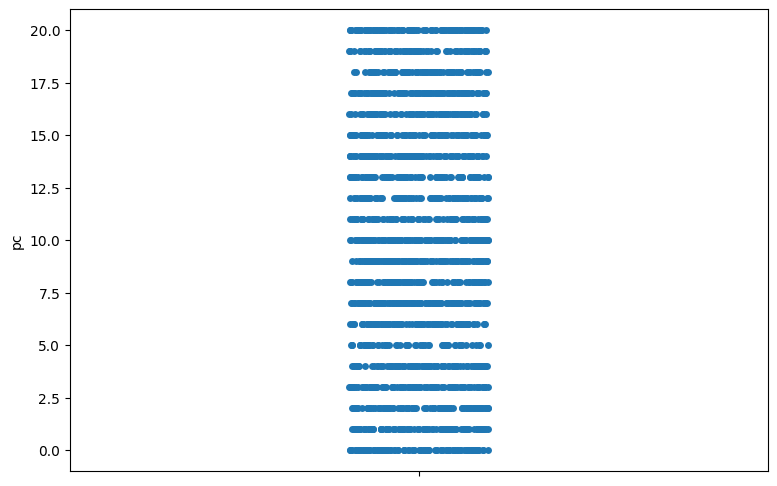

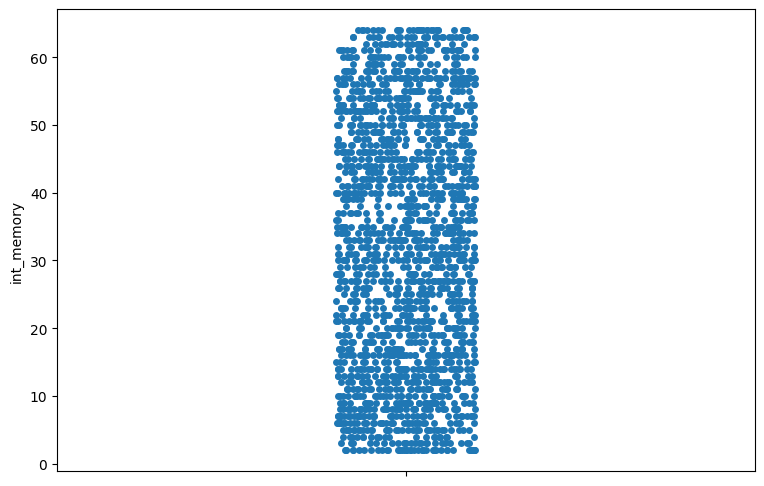

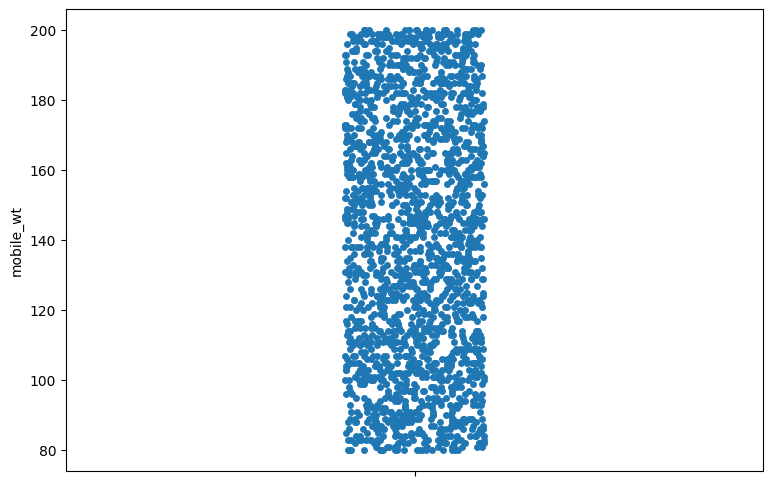

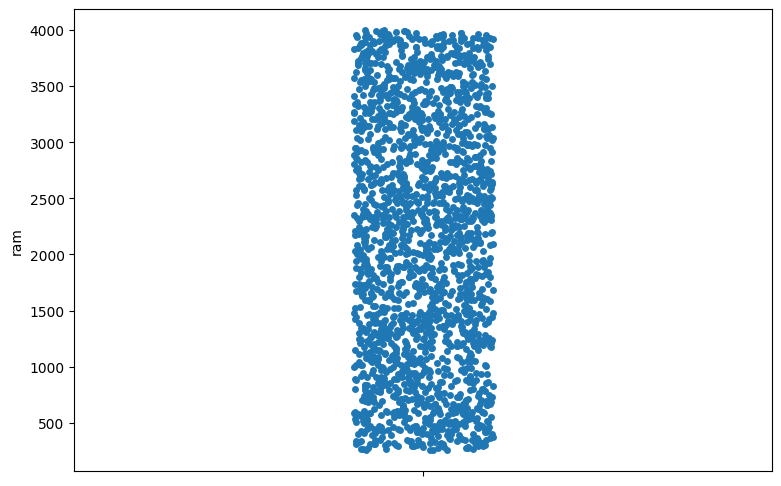

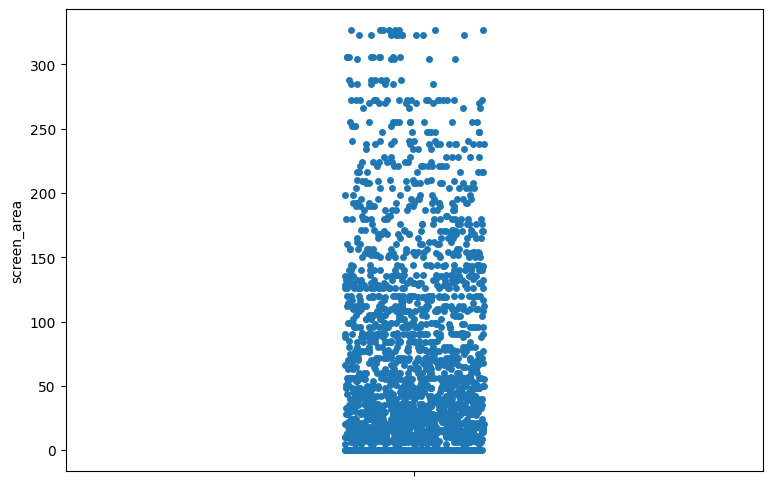

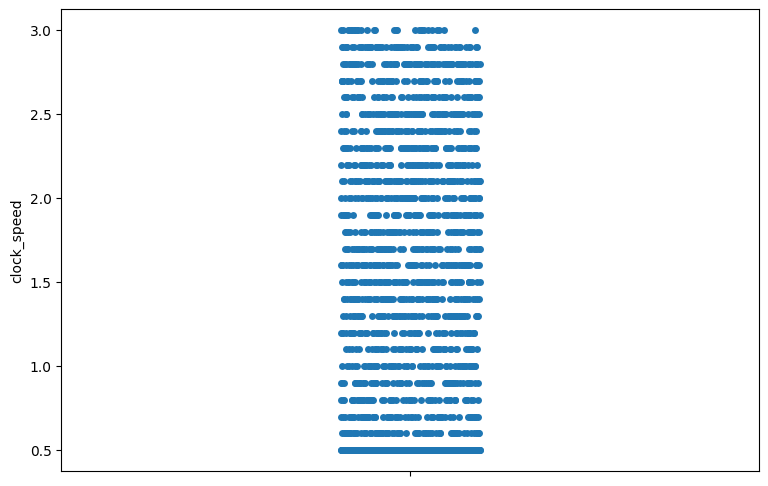

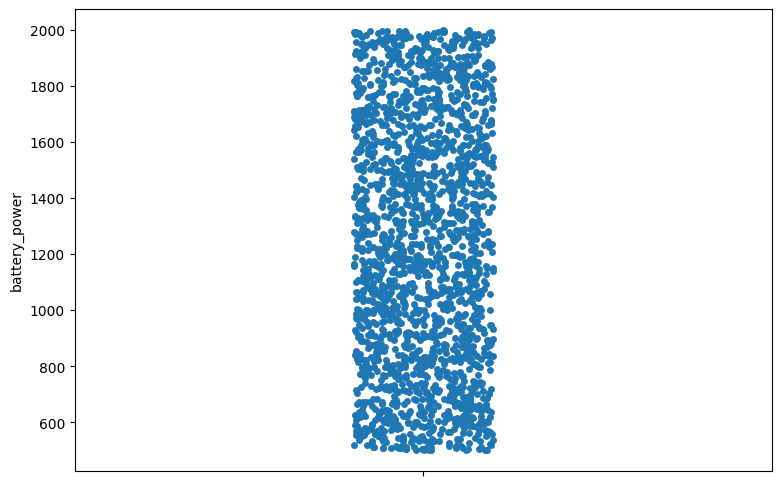

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df1:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Again, as it is a classification problem I restrict the both boundaries and I pull down the higher value restricted to the upper limit.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

lower inner fence: Q1–1.5*IQ

upper inner fence: Q3 + 1.5*IQ

lower outer fence: Q1–3*IQ

upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# We removed the price range feature from features as it is the target variable
calc_vif(df[[i for i in df1 if i not in ['price_range']]])

,variables,VIF
0,n_cores,4.470175
1,px_resolution_size_per_square_inch,2.164040
2,fc,3.404193
3,m_dep,3.858602
4,talk_time,4.752452
5,pc,6.142531
6,int_memory,3.842636
7,mobile_wt,11.395194
8,ram,4.536292
9,screen_area,2.059654


In [ ]:
#we removed the mobile weight feature from features as it is having VIF equal to 11.4 which is high multicolinearity
calc_vif(df[[i for i in df1 if i not in ['price_range','mobile_wt']]])

,variables,VIF
0,n_cores,4.302582
1,px_resolution_size_per_square_inch,2.144918
2,fc,3.403590
3,m_dep,3.736130
4,talk_time,4.582059
5,pc,6.058437
6,int_memory,3.757233
7,ram,4.388793
8,screen_area,2.046343
9,clock_speed,4.011078


In [ ]:
#We removed the battery power feature as it is having VIF equal to 7.13 which is high multicollinearity
calc_vif(df[[i for i in df1 if i not in ['price_range','mobile_wt','battery_power']]])

,variables,VIF
0,n_cores,4.194020
1,px_resolution_size_per_square_inch,2.118139
2,fc,3.401997
3,m_dep,3.608292
4,talk_time,4.334722
5,pc,5.975469
6,int_memory,3.662274
7,ram,4.267282
8,screen_area,2.037497
9,clock_speed,3.864038


In [ ]:
#putting numerical features in the numerical_features variable
numerical_features=['int_memory','screen_area','clock_speed','talk_time','n_cores','px_resolution_size_per_square_inch','ram','fc','m_dep','pc']

In [ ]:
#putting categorical features in the categorical_features variable
categorical_features=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

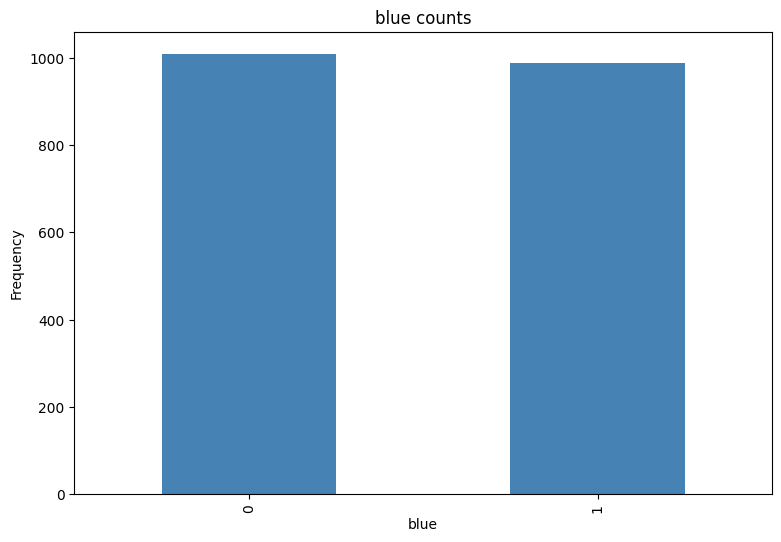

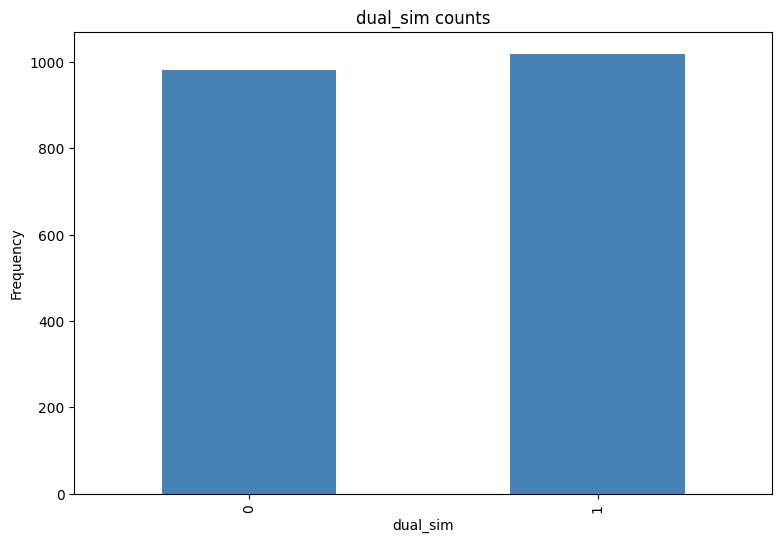

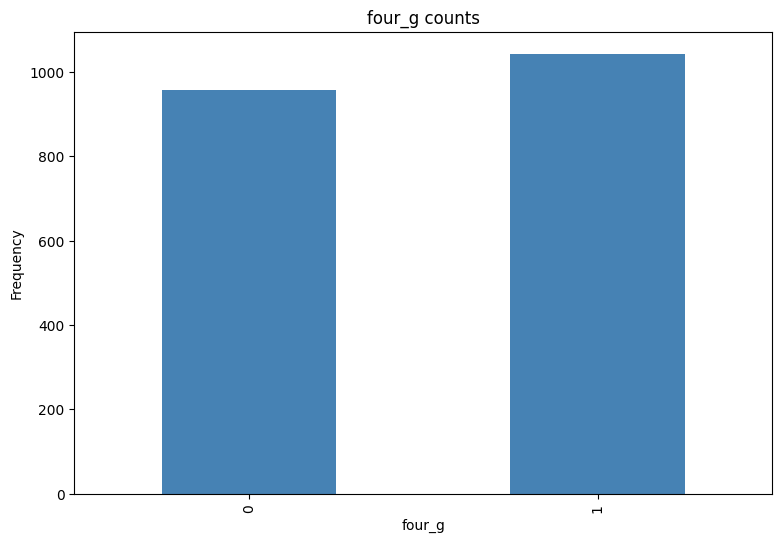

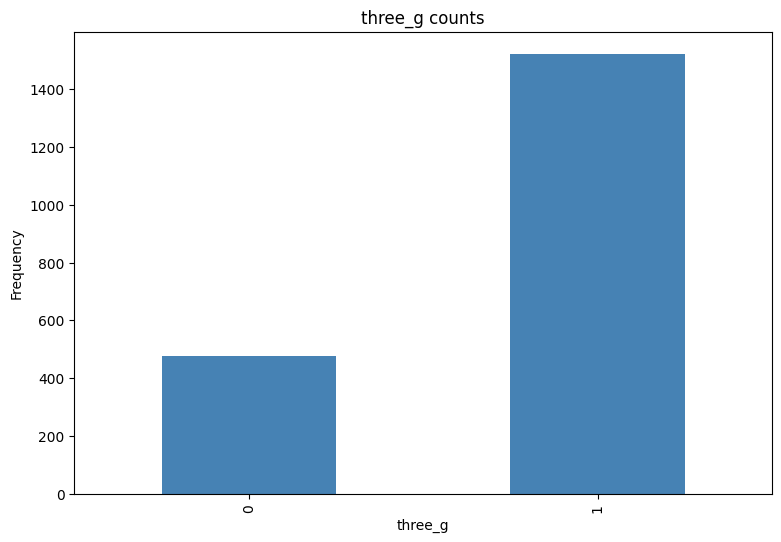

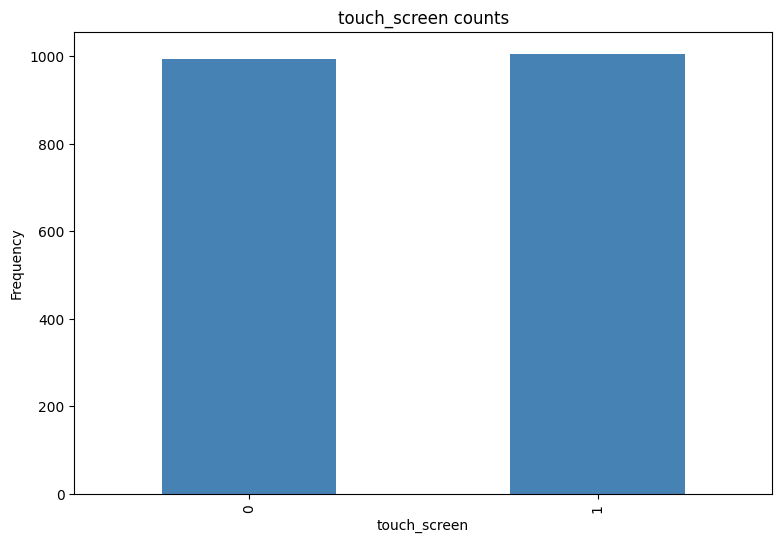

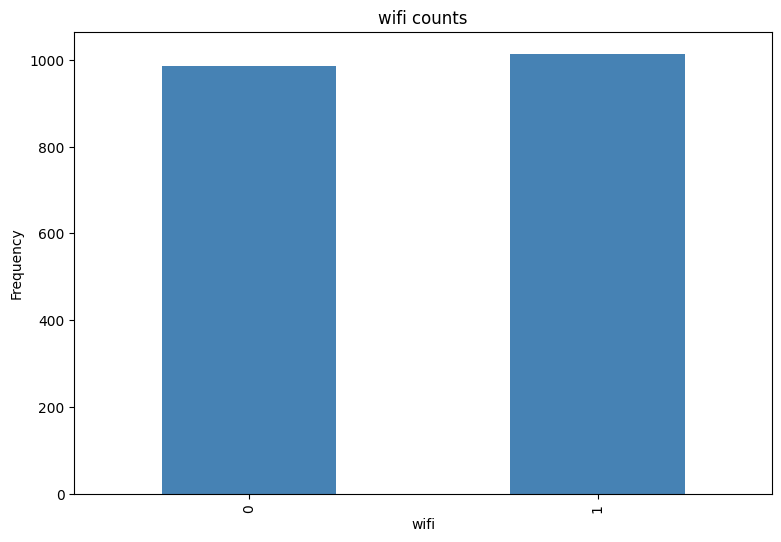

In [ ]:
#Plotting the categorical features value counts
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
#putting all the required features that is numerical as well as categorical in single variable
features = numerical_features.copy()
features.extend(categorical_features)

In [ ]:
features

['int_memory',
 'screen_area',
 'clock_speed',
 'talk_time',
 'n_cores',
 'px_resolution_size_per_square_inch',
 'ram',
 'fc',
 'm_dep',
 'pc',
 'blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi']

##### What all feature selection methods have you used  and why?

We have used Variance inflation factor in our feature selection. In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=1/{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1

And we are able to keep our VIF around 5 that is our variables are moderately correlated.

##### Which all features you found important and why?

'int_memory', 'screen_area', 'clock_speed', 'talk_time', 'n_cores', 'px_resolution_size_per_square_inch', 'ram','fc', 'm_dep', 'pc', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi' are the features which are of importance as it is not multicolinear as shown by VIF.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
#assigning independant features to x variable and dependant data to y variable
x=df[features]
y=df['price_range']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1600, 16)
(400, 16)


##### What data splitting ratio have you used and why?

As the data is large so 20% test data is good for training purpose

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

In [ ]:
print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8175


In [ ]:
pred_prob = rf_model.predict_proba(X_train)

In [ ]:
test_pred_prob = rf_model.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, pred_prob, multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

 
roc_auc_score
1.0


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_pred_prob,multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        96
           1       0.76      0.73      0.74        96
           2       0.66      0.73      0.69        89
           3       0.91      0.87      0.89       119

    accuracy                           0.82       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400

 
roc_auc_score
0.9451599171541164


I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for Price range but, I am also interested to see the result for price_range result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 93%, 76%, 66% and 91% and recall of 92%,73%,73% and 87% and f1-score of 92%, 74%, 69% and 89% for price range data.

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
6,ram,0.51
5,px_resolution_size_per_square_inch,0.09
1,screen_area,0.06
0,int_memory,0.05
2,clock_speed,0.04
3,talk_time,0.04
7,fc,0.04
9,pc,0.04
4,n_cores,0.03
8,m_dep,0.03


In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

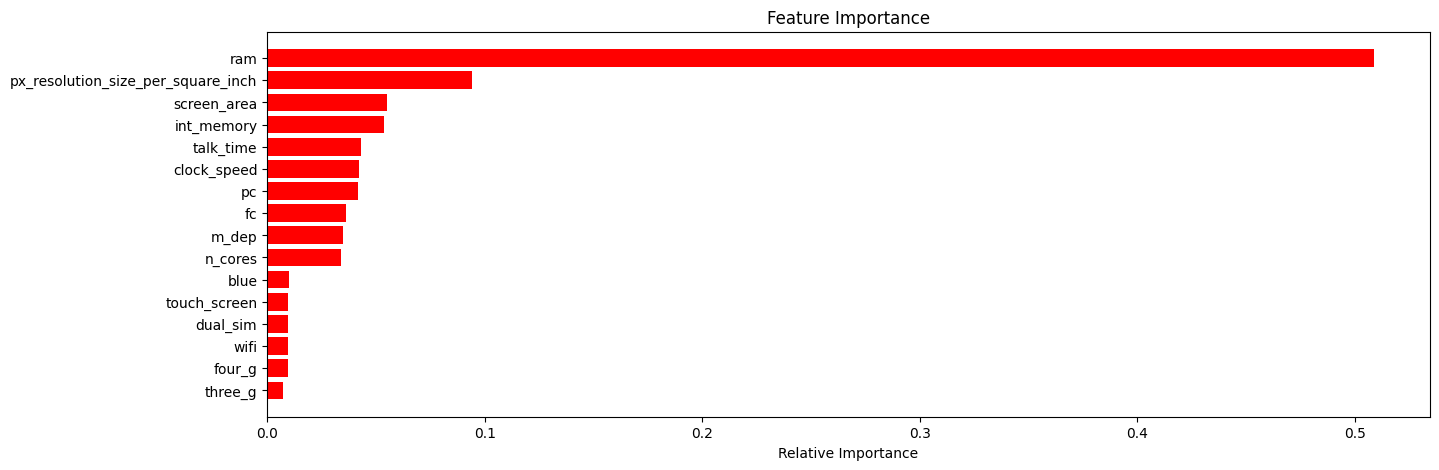

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

# Predict on the model
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(y_train,train_preds)

0.79

In [ ]:
# Obtain accuracy on test set
accuracy_score(y_test,test_preds)

0.7775

In [ ]:
pred_prob = classifier.predict_proba(X_train)

In [ ]:
test_pred_prob = classifier.predict_proba(X_test)

In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, pred_prob,multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

 
roc_auc_score
0.9382196205670638


In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_pred_prob,multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        96
           1       0.76      0.73      0.74        96
           2       0.66      0.73      0.69        89
           3       0.91      0.87      0.89       119

    accuracy                           0.82       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400

 
roc_auc_score
0.9156949685179988


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for price range data.

For testing dataset, i found precision of 93%, 76% and 66% and 91 and recall of 92%, 73%, 73% and 87% and f1-score of 92%, 74%, 69% and 89% for price range data.

There is no improvement in percentage.

### ML Model - 2

In [ ]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [ ]:
train_pred_proba=xg_models.predict_proba(X_train)
test_pred_proba=xg_models.predict_proba(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_pred_proba, multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

 
roc_auc_score
1.0


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_pred_proba, multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.77      0.72      0.75        98
           2       0.68      0.68      0.68        98
           3       0.86      0.88      0.87       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.81      0.80       400

 
roc_auc_score
0.9508699689006571


 I used XGBoost algorithm to create the model. As I got there good result.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for price range data.

For testing dataset, i found precision of 91%,77%, 68% and 86% and recall of 93%, 72%, 68% and 88% and f1-score of 92%, 75%, 68% and 87% for price range data.

In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
6,ram,0.41
5,px_resolution_size_per_square_inch,0.10
13,three_g,0.07
0,int_memory,0.04
3,talk_time,0.04
4,n_cores,0.04
14,touch_screen,0.04
1,screen_area,0.03
2,clock_speed,0.03
7,fc,0.03


In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

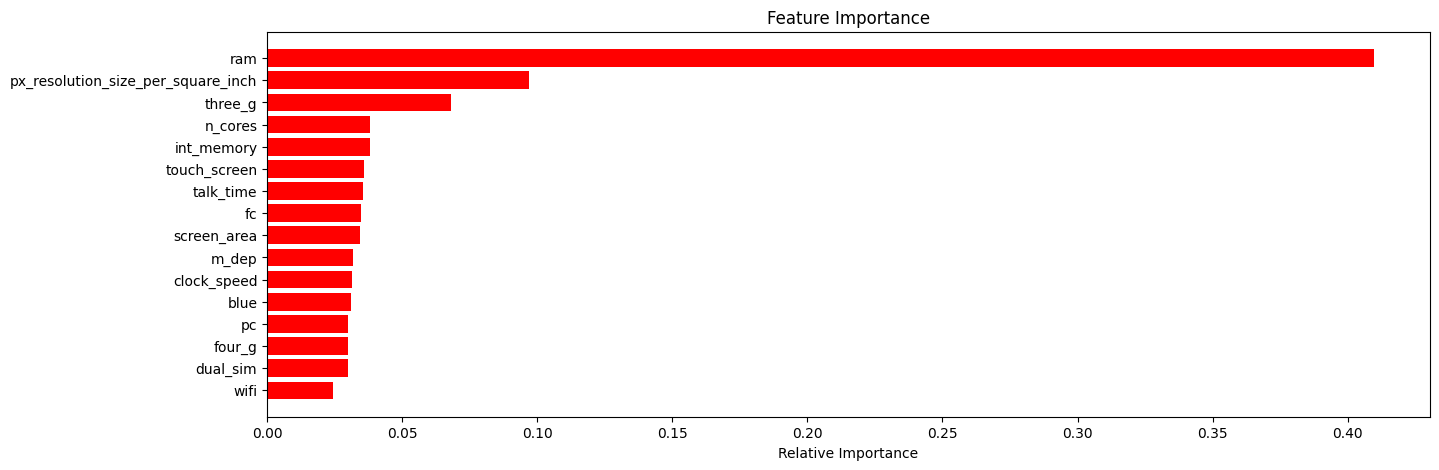

In [ ]:
#Plotting feature importances
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[06:16:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[06:16:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[06:16:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[06:16:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[06:16:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [ ]:
#showing best scores and best parameters
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: nan using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Predicting probabilities
train_pred_proba1=xg_grid1.predict_proba(X_train)
test_pred_proba1=xg_grid1.predict_proba(X_test)

In [ ]:
#printing classification report of training data
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_pred_proba1, multi_class='ovr'))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       411
           1       0.96      0.97      0.96       404
           2       0.96      0.96      0.96       400
           3       0.99      0.99      0.99       385

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

 
roc_auc_score
0.999411348245841


In [ ]:
#Printing classification report of testing data
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_pred_proba1, multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.73      0.74      0.74        90
           2       0.69      0.67      0.68       101
           3       0.86      0.88      0.87       111

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.81      0.81      0.81       400

 
roc_auc_score
0.9538523381128055


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 100%, 96%, 96% and 99% and recall of 92%, 74%, 67% and 88% and f1-score of 99%, 96%, 96% and 99% for price range data.

For testing dataset, i found precision of 95%, 73%, 69% and 86% and recall of 92%, 74%, 67% and 88% and f1-score of 93%, 74%, 68% and 87% for price range data.
 We can see quite improvement in precision and f1 score

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

As the prediction accuracy, recall and f1 scores are good of testing data. So the model can be used to predict class of price range.  

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1) there is no linearity in data either considering weight or slimness of mobile with respect to price range whether it is mobile with dual sim or no dual sim.

2) As the screen area is increasing, the resolution size is having ups and downs. We are having peak value of different price ranges are as follows:

*  0(low cost) at resolution size of 3.6*10^6 and screen area of around 240.
* 1(medium cost) at resolution size of 3.5*10^6 and screen area of around 200.
* 2(high cost) at resolution size of 2.7*10^6 and screen area of around 105.
* 3(very high cost) at resolution size of 3.1*10^6 and screen area of around 150.

This shows that there is no pattern which shows linearity of the values in the graph.

3) clockspeed of 0.5 which is the lowest value is common among all price segment which means customer are not attracted towards mobiles which have high clockspeed.

4) as ram increases price range also increases among all internal memory category.

5) primary camera with 1 megapixel value are having max count among three price segment means except medium price range all price ranges have max count.

6) There are less number of customers who prefer bluetooth with wifi compared to bluetooth with no wifi but as the price range increases number of customers prefering bluetooth with wifi increases.

7) no matter how much battery power it is, the corresponding value can always have any price range. There is no linear relationship.

8) we have more number of mobile phones which have 4G as well as 3G network means customer prefer mobiles with both 4G and 3G network and each price range have nearly equal number of 4G mobiles.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***